In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, learning_curve, validation_curve
from sklearn.preprocessing import LabelBinarizer, label_binarize, StandardScaler, PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, precision_score, roc_curve, classification_report
from sklearn.metrics import auc, precision_recall_curve, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.metrics import cohen_kappa_score, brier_score_loss
from sklearn.calibration import calibration_curve
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import GridSearchCV
import shap
from sklearn.inspection import permutation_importance, partial_dependence, PartialDependenceDisplay
import logging
from sklearn.calibration import calibration_curve,  CalibrationDisplay
from sklearn.ensemble import IsolationForest
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from scipy import stats
import statsmodels.api as sm
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import multivariate_normal
from statsmodels.multivariate.manova import MANOVA
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from factor_analyzer.factor_analyzer import calculate_kmo
from scipy.stats import chi2_contingency
import optuna
from optuna.samplers import TPESampler

In [4]:
dff = pd.read_csv(r"C:\Users\Robyi\Documents\Data Science Dataset\cancer.csv")
dff.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [5]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
dff = dff.drop(['id','Unnamed: 32'], axis =1)

In [7]:
dff.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [8]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [24]:
dff.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [25]:
dff.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [26]:
dff.duplicated().sum()

0

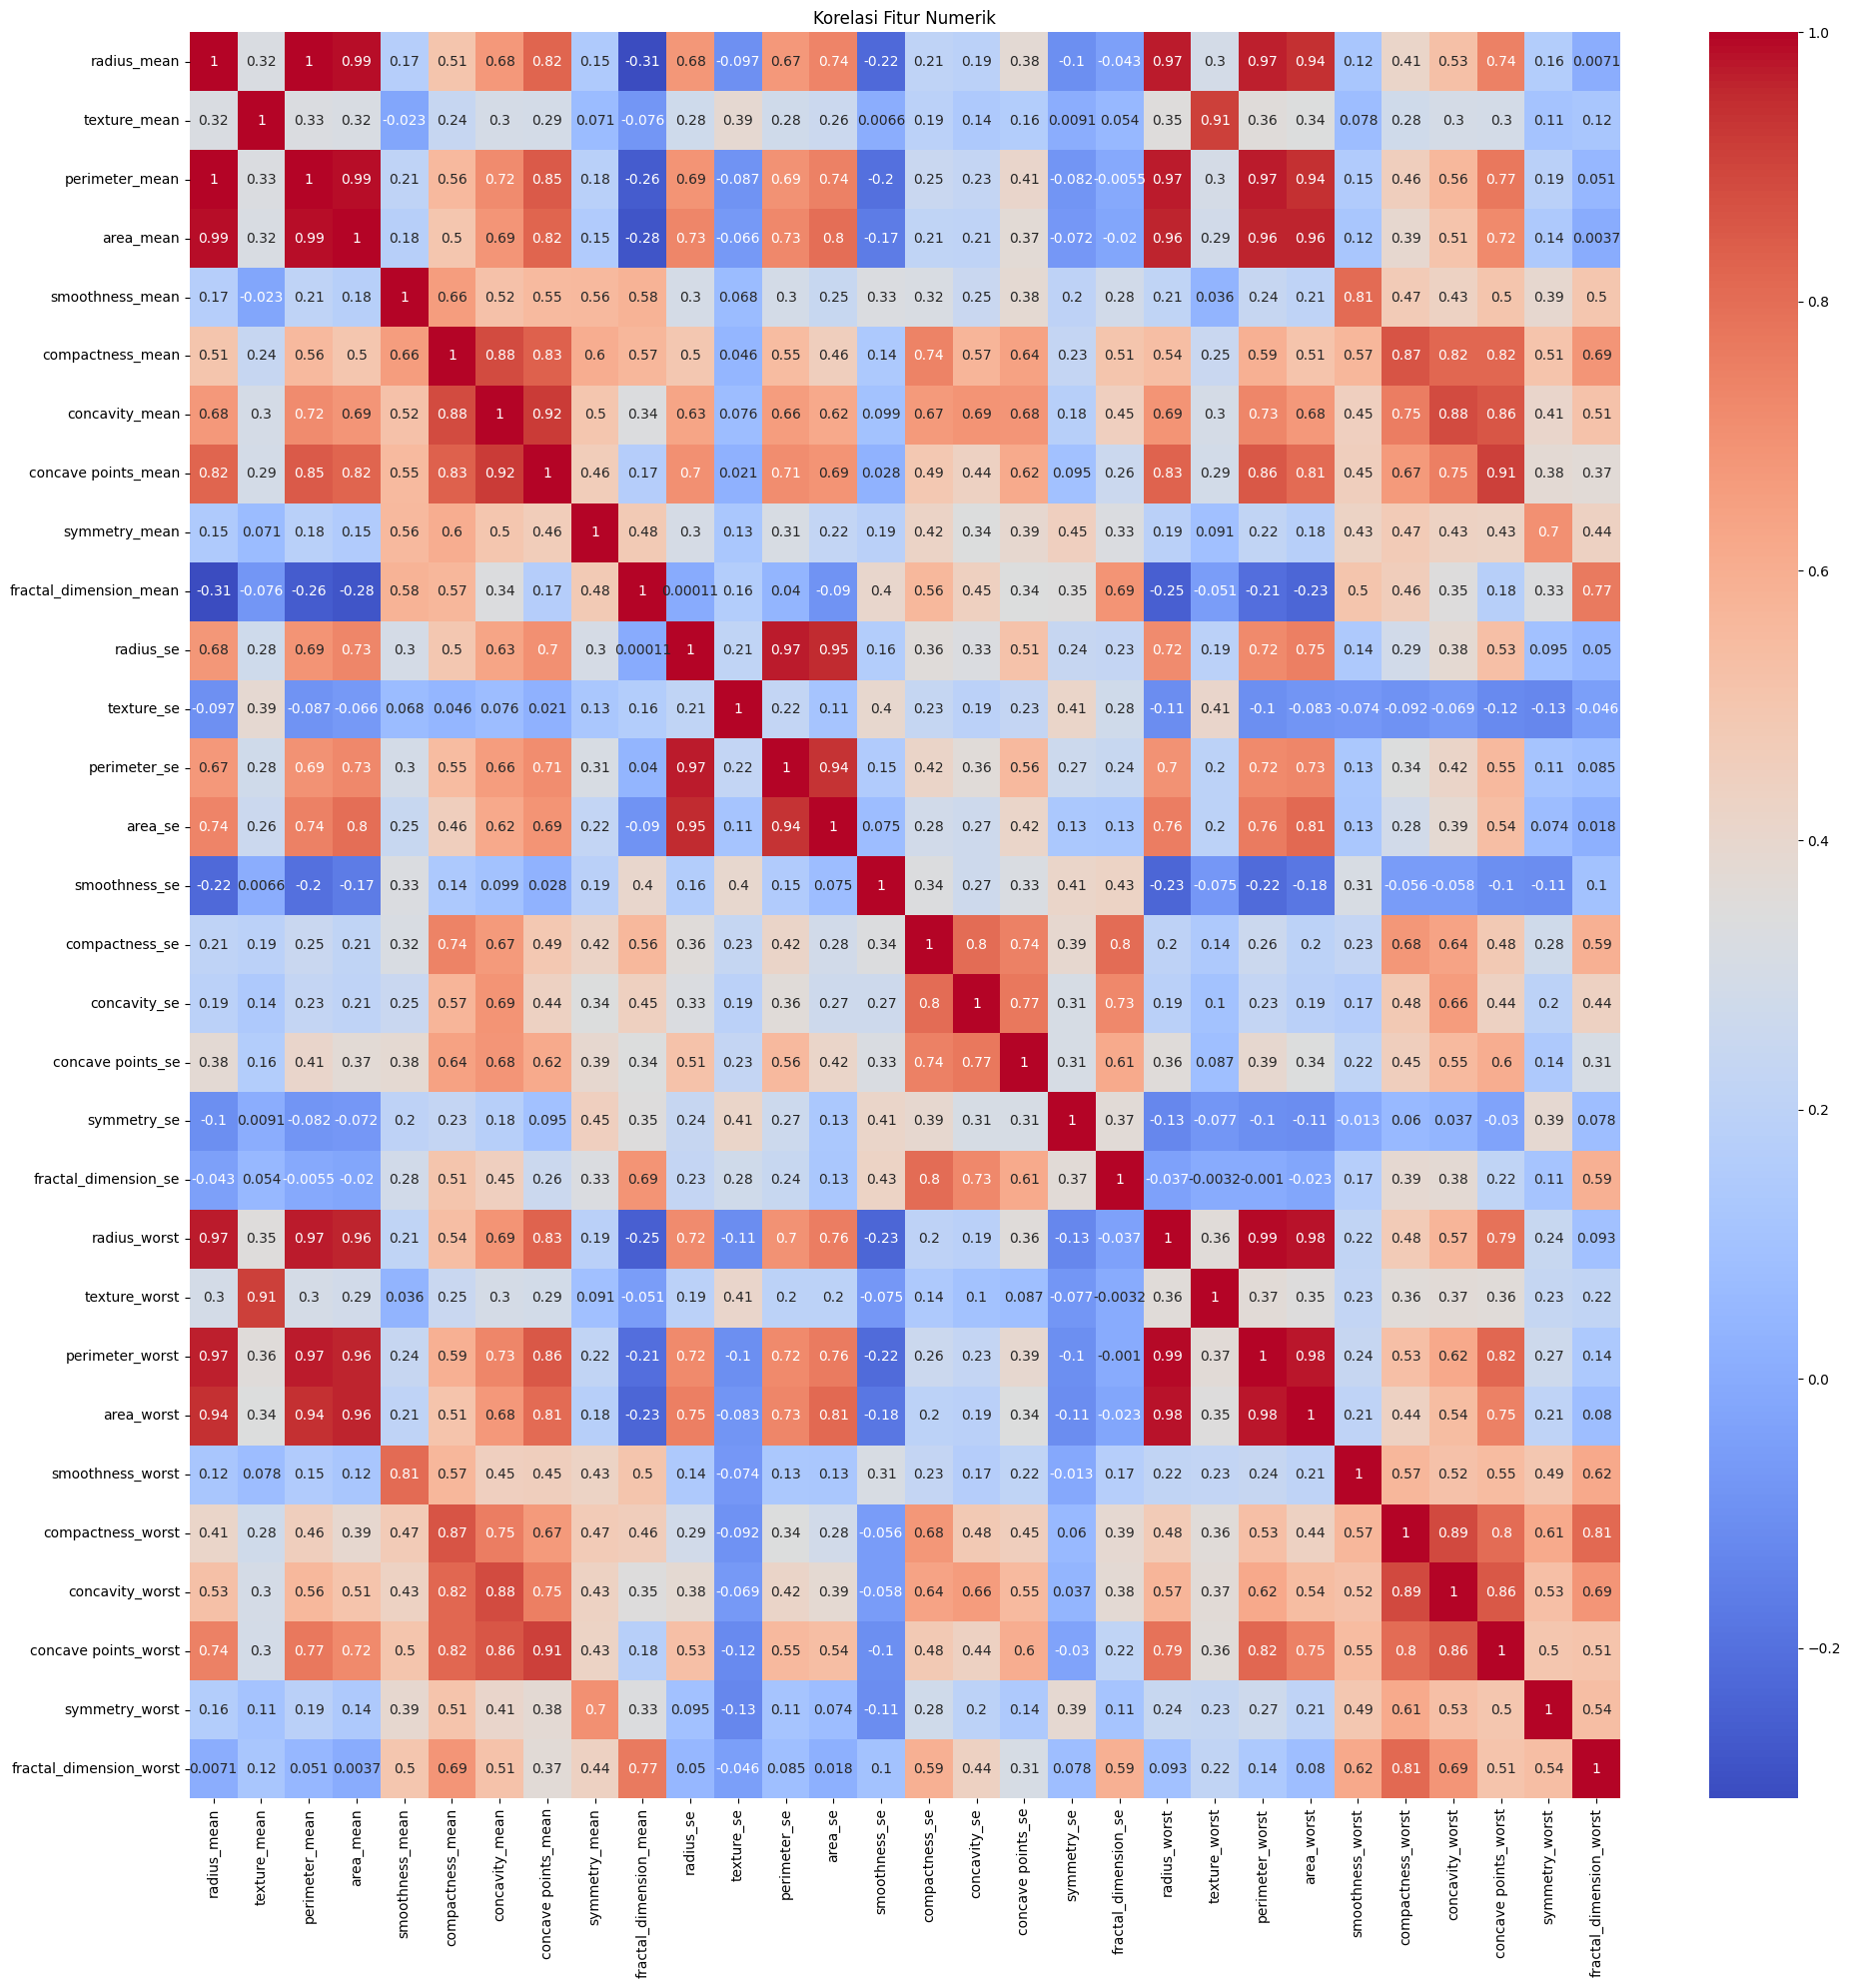

In [34]:
plt.figure(figsize=(20,20))
sns.heatmap(dff.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur Numerik')
plt.tight_layout()
plt.show()

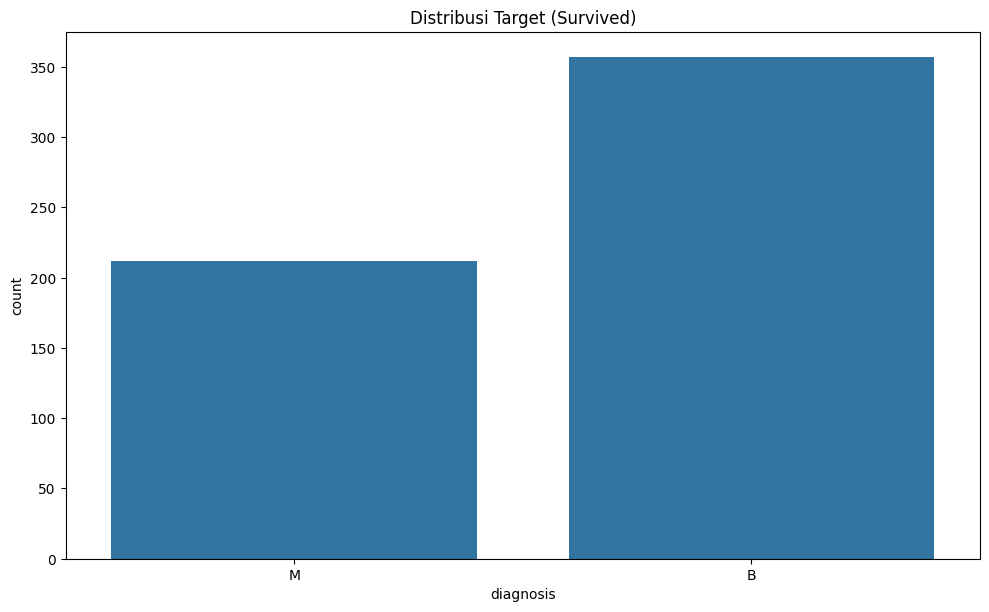

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(x='diagnosis', data=dff)
plt.tight_layout()
plt.title('Distribusi Target (Survived)')
plt.show()

In [113]:
missing = dff.isnull().sum().sort_values(ascending=False)
missing_percent = (dff.isnull().sum()/dff.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing, missing_percent], axis=1, keys=['Total', 'Persen'])
print(missing_data)

                         Total  Persen
diagnosis                    0     0.0
compactness_se               0     0.0
symmetry_worst               0     0.0
concave points_worst         0     0.0
concavity_worst              0     0.0
compactness_worst            0     0.0
smoothness_worst             0     0.0
area_worst                   0     0.0
perimeter_worst              0     0.0
texture_worst                0     0.0
radius_worst                 0     0.0
fractal_dimension_se         0     0.0
symmetry_se                  0     0.0
concave points_se            0     0.0
concavity_se                 0     0.0
smoothness_se                0     0.0
radius_mean                  0     0.0
area_se                      0     0.0
perimeter_se                 0     0.0
texture_se                   0     0.0
radius_se                    0     0.0
fractal_dimension_mean       0     0.0
symmetry_mean                0     0.0
concave points_mean          0     0.0
concavity_mean           

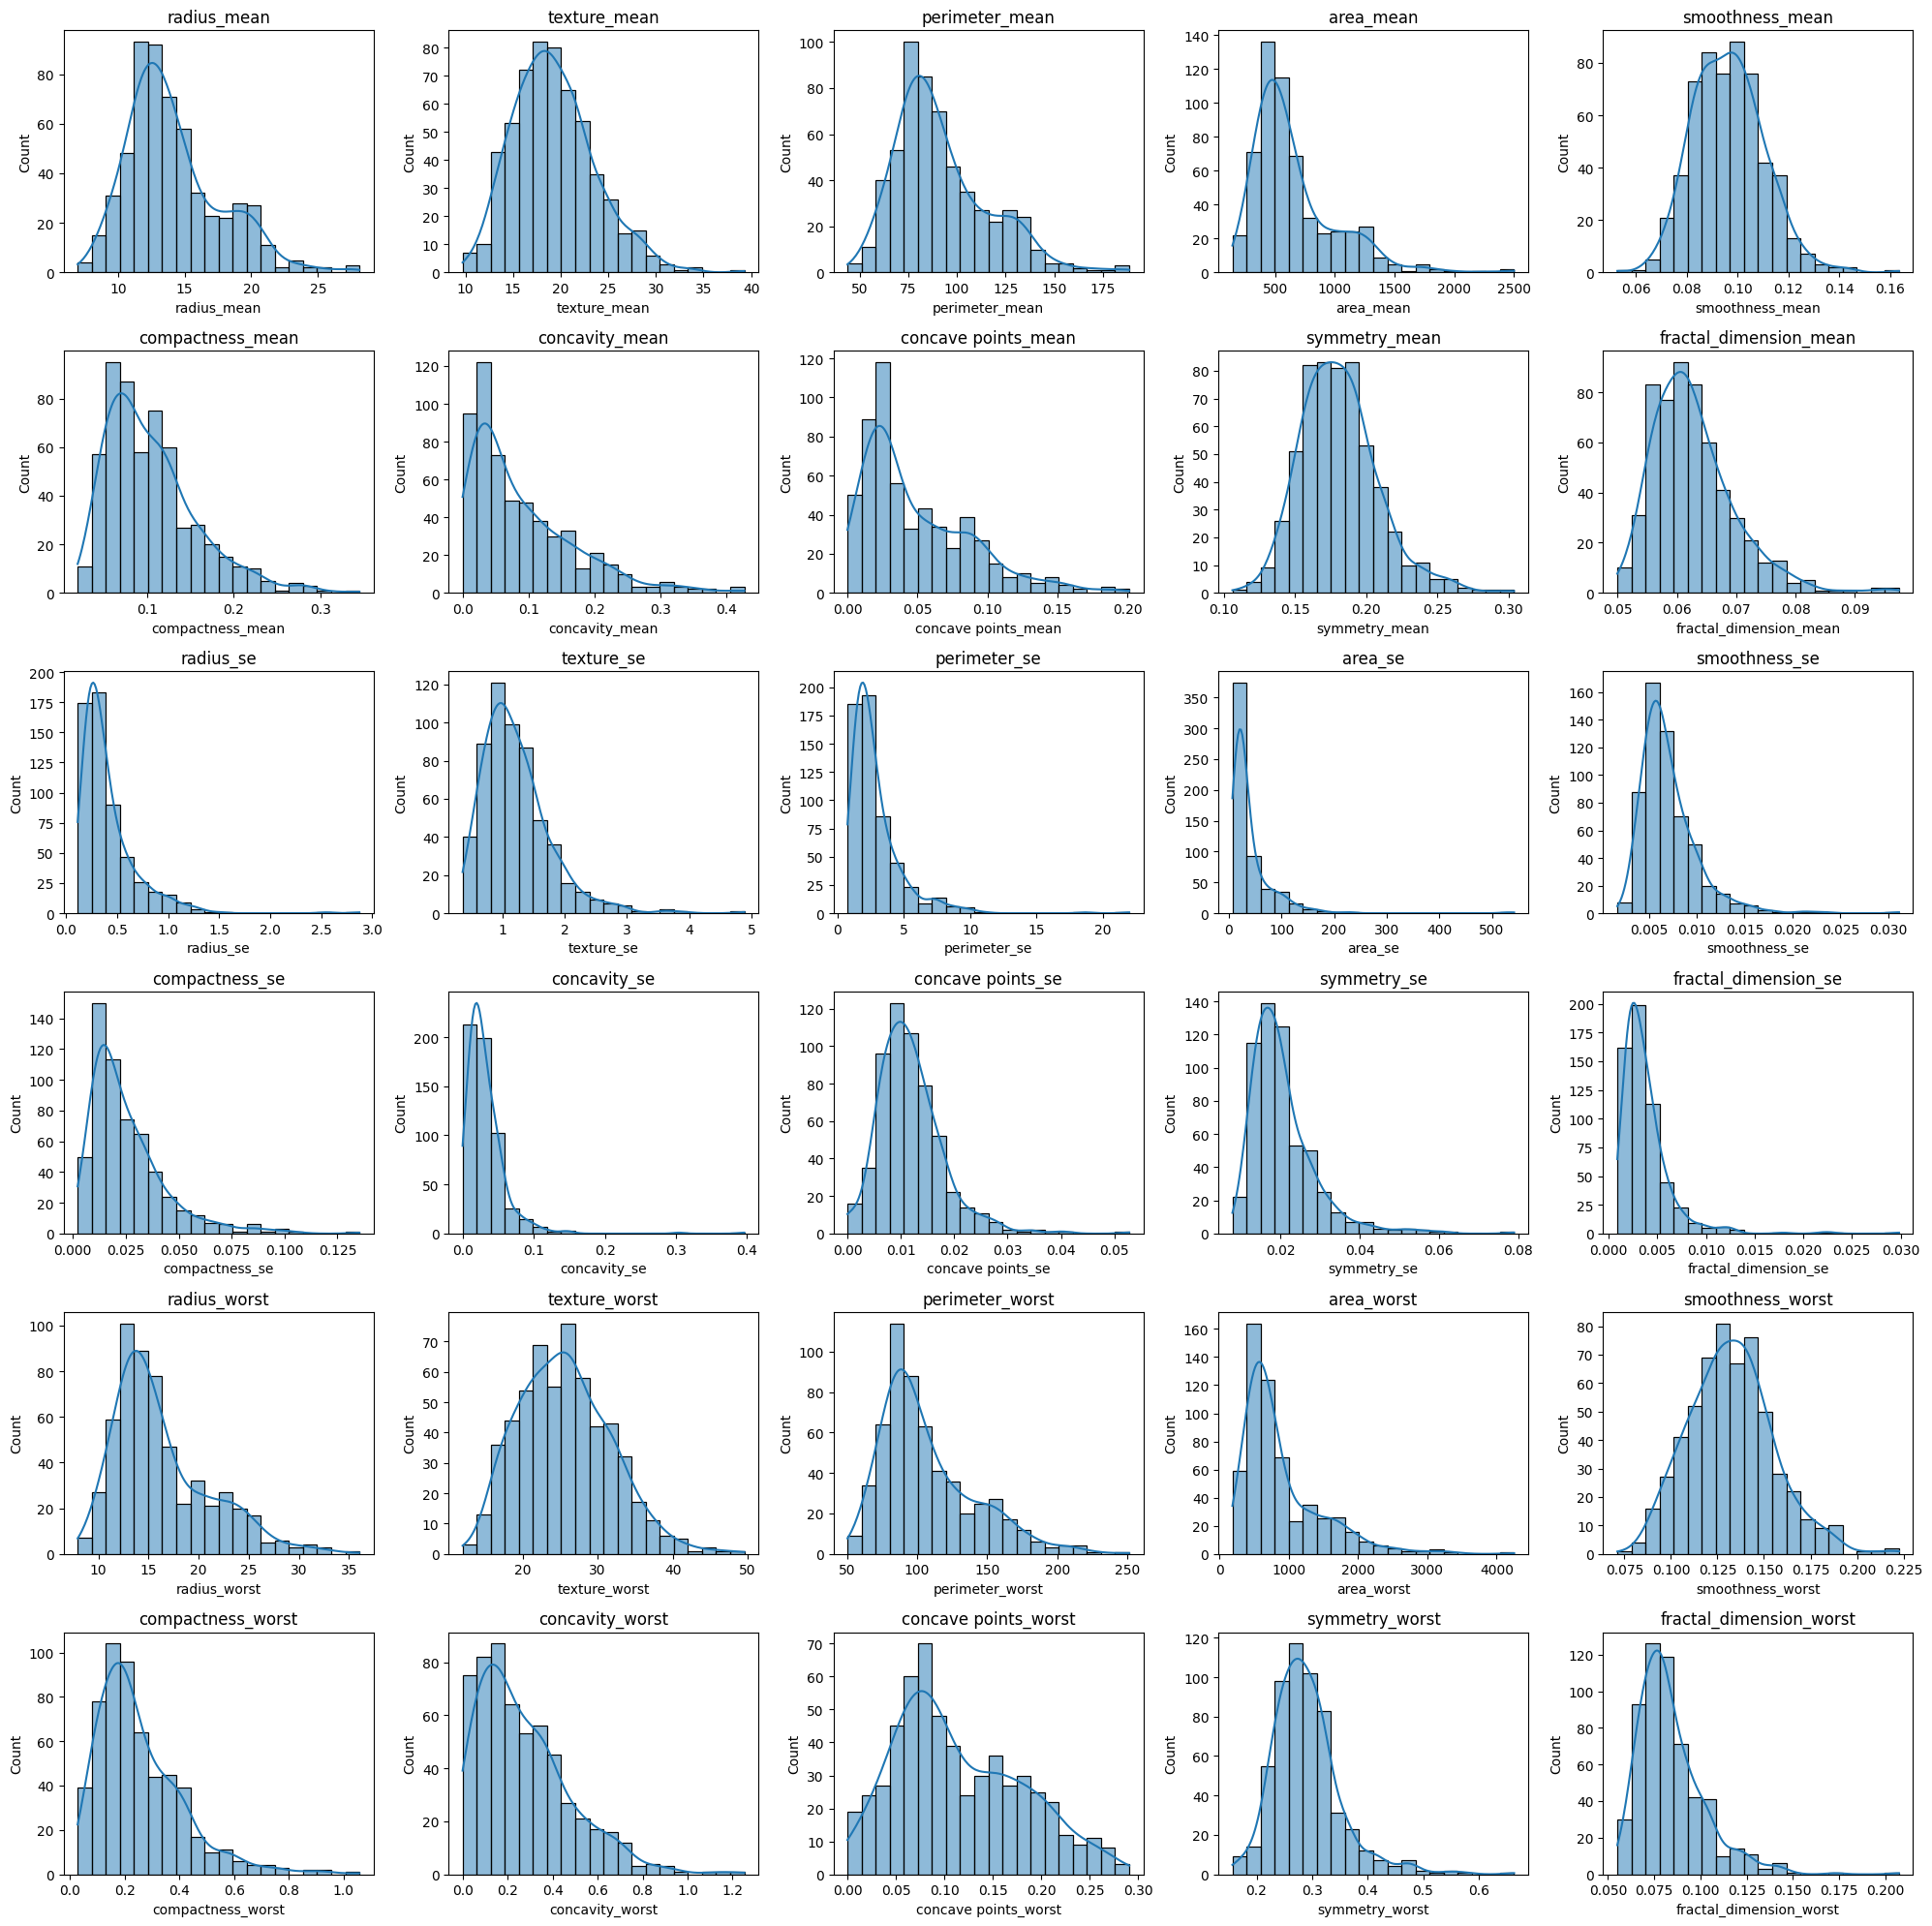

In [52]:
numeric_cols = dff.select_dtypes(include=['number']).columns
n_cols = len(numeric_cols)

rows = 6
cols = 5
fig, axs = plt.subplots(rows, cols, figsize=(20, 20))

for i, ax in enumerate(axs.flat):
    if i < n_cols:
        col = numeric_cols[i]
        sns.histplot(dff[col], bins=20, kde=True, ax=ax)
        ax.set_title(f'{col}')
    else:
        ax.set_visible(False)

plt.tight_layout()
plt.show()

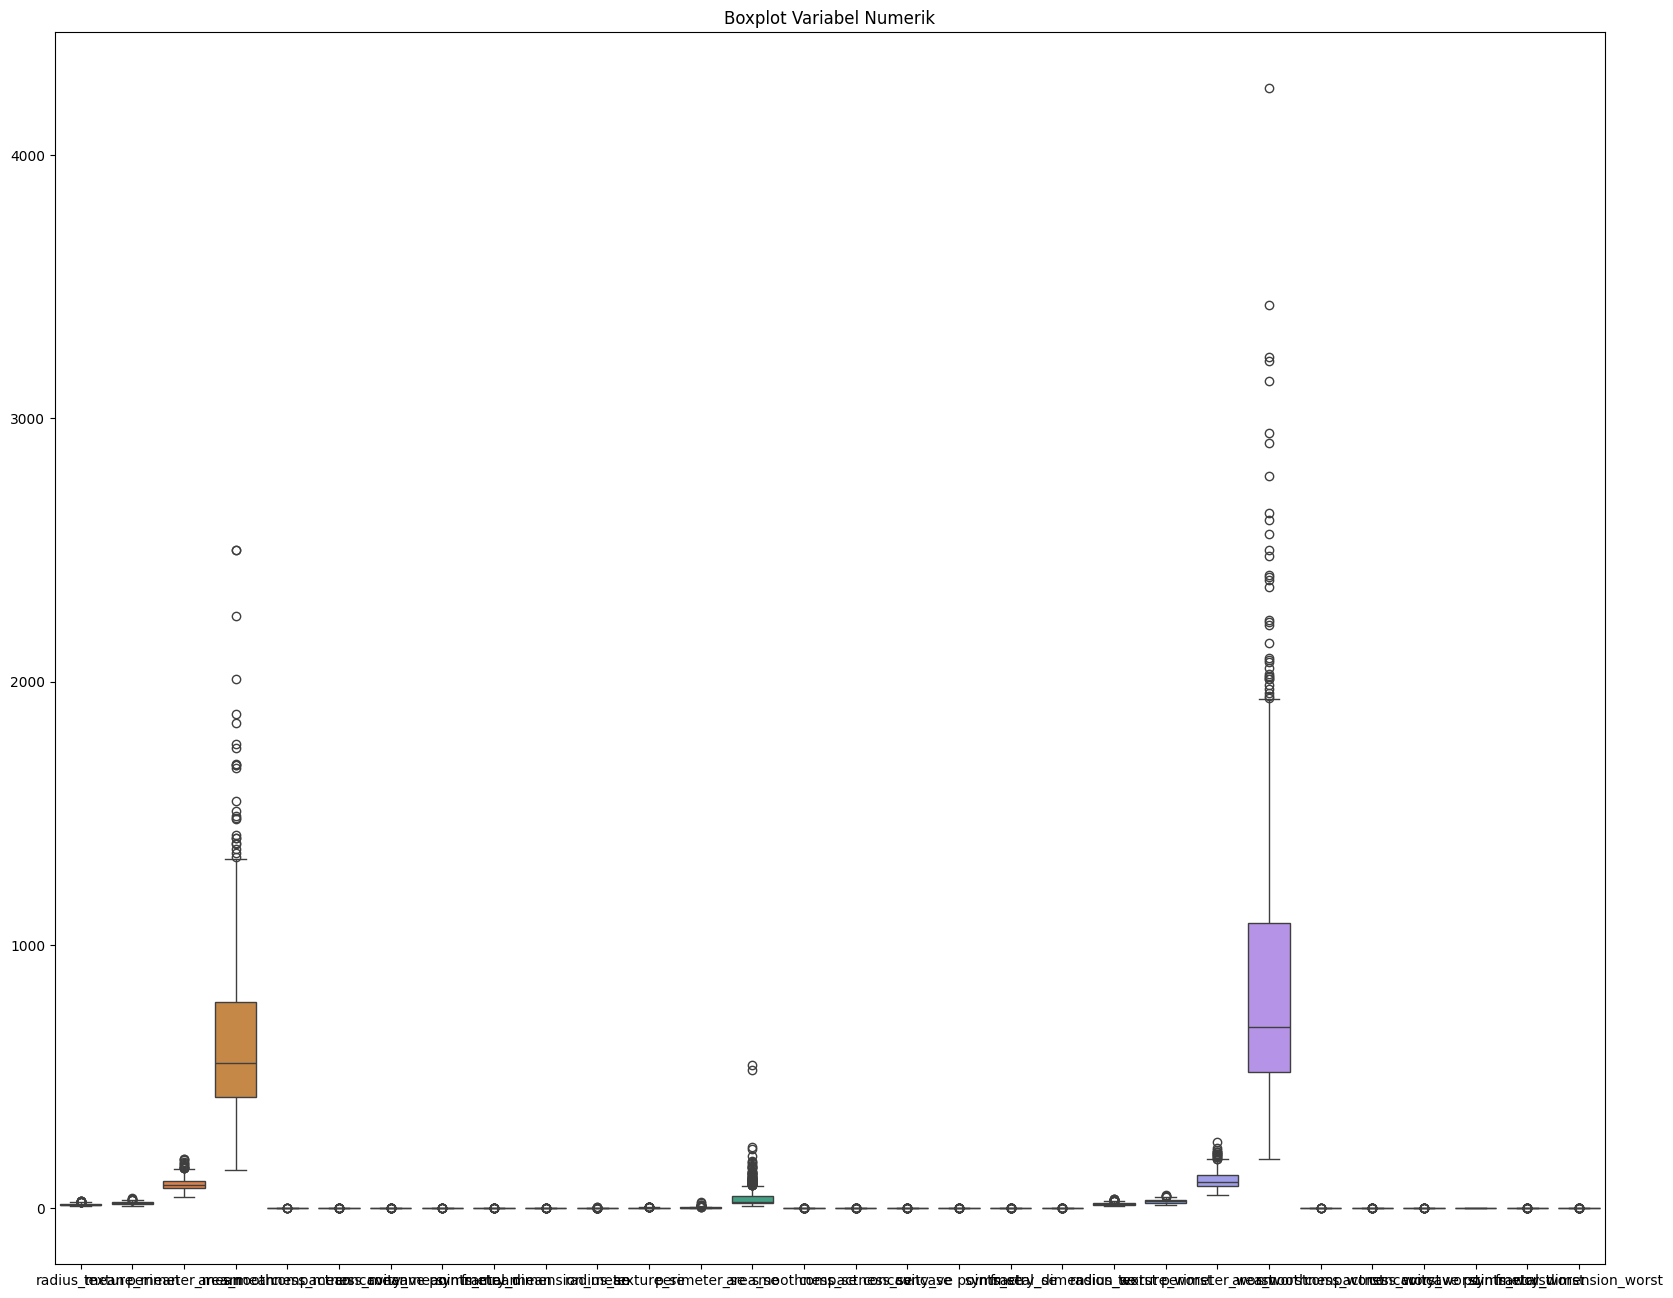

In [51]:
plt.figure(figsize=(20,16))
sns.boxplot(data=dff.drop(['diagnosis'], axis=1))
plt.title('Boxplot Variabel Numerik')
plt.show()

In [53]:
numeric_cols = dff.select_dtypes(include=['number']).columns
n_features = len(numeric_cols)

features_group1 = numeric_cols[:15]
features_group2 = numeric_cols[15:] 

<Figure size 2000x2000 with 0 Axes>

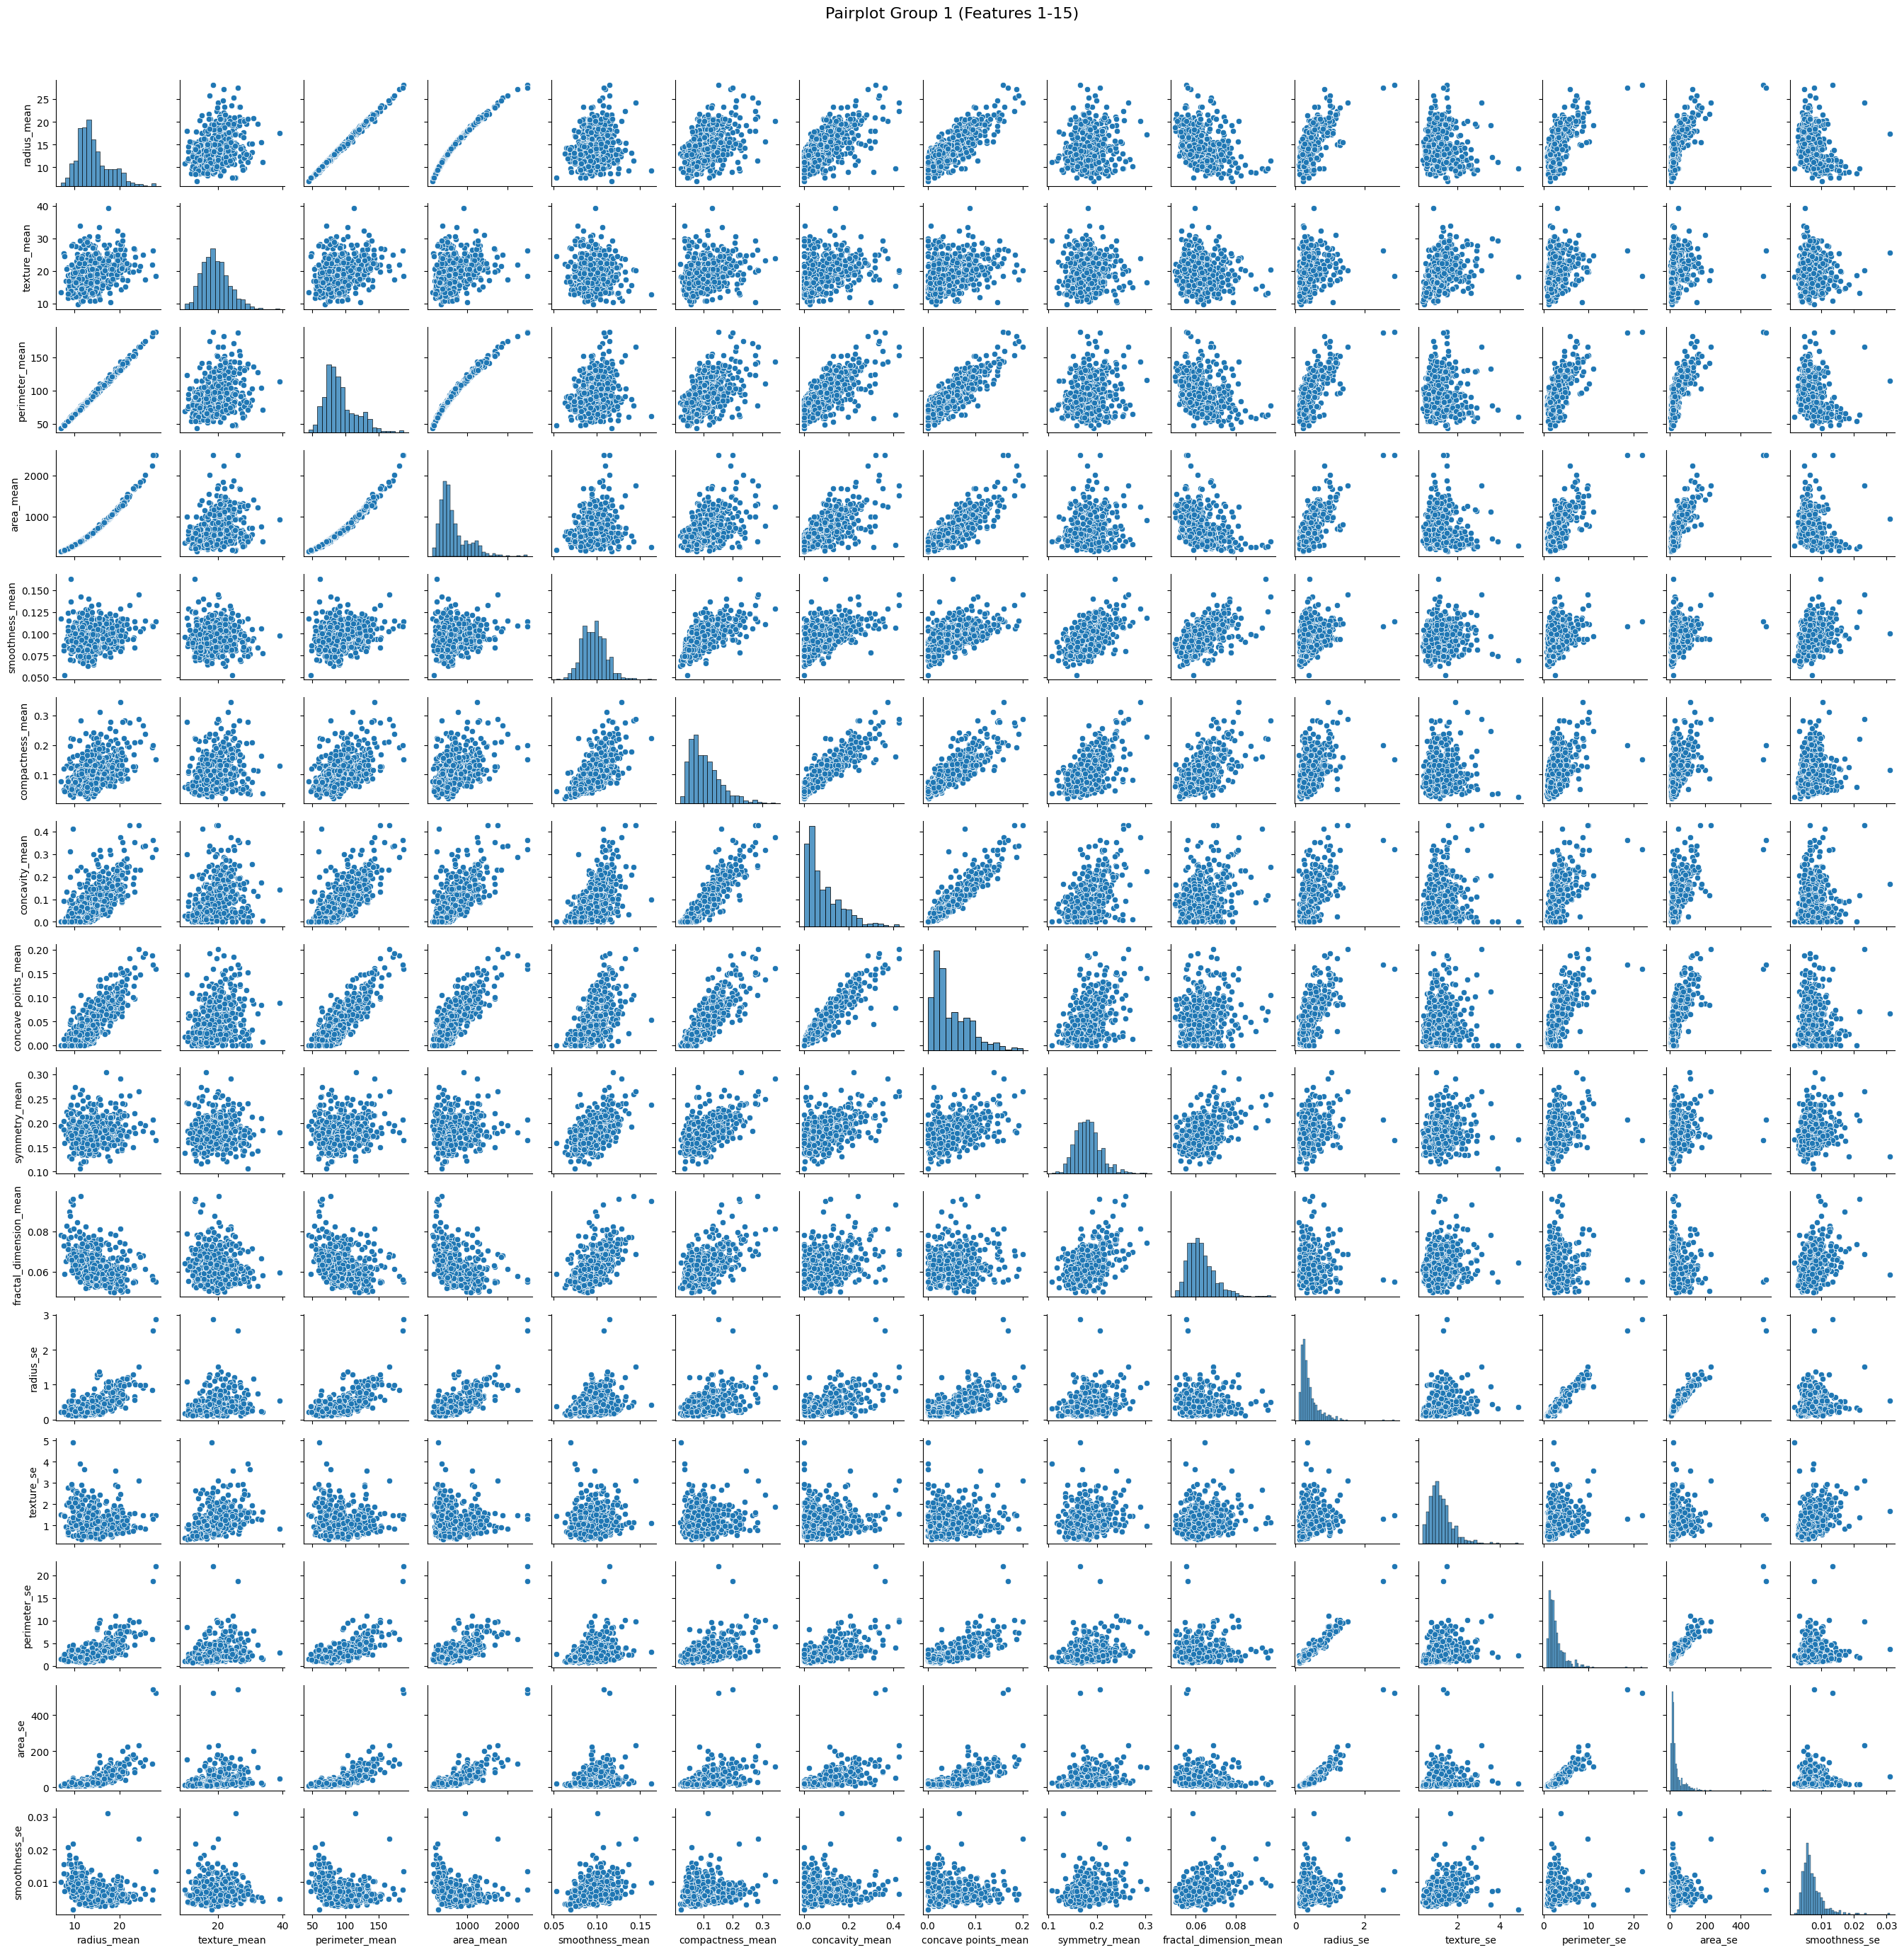

In [55]:
plt.figure(figsize=(20, 20))
g1 = sns.pairplot(dff[features_group1], height=1.8, corner=False)
plt.suptitle('Pairplot Group 1 (Features 1-15)', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

<Figure size 2000x2000 with 0 Axes>

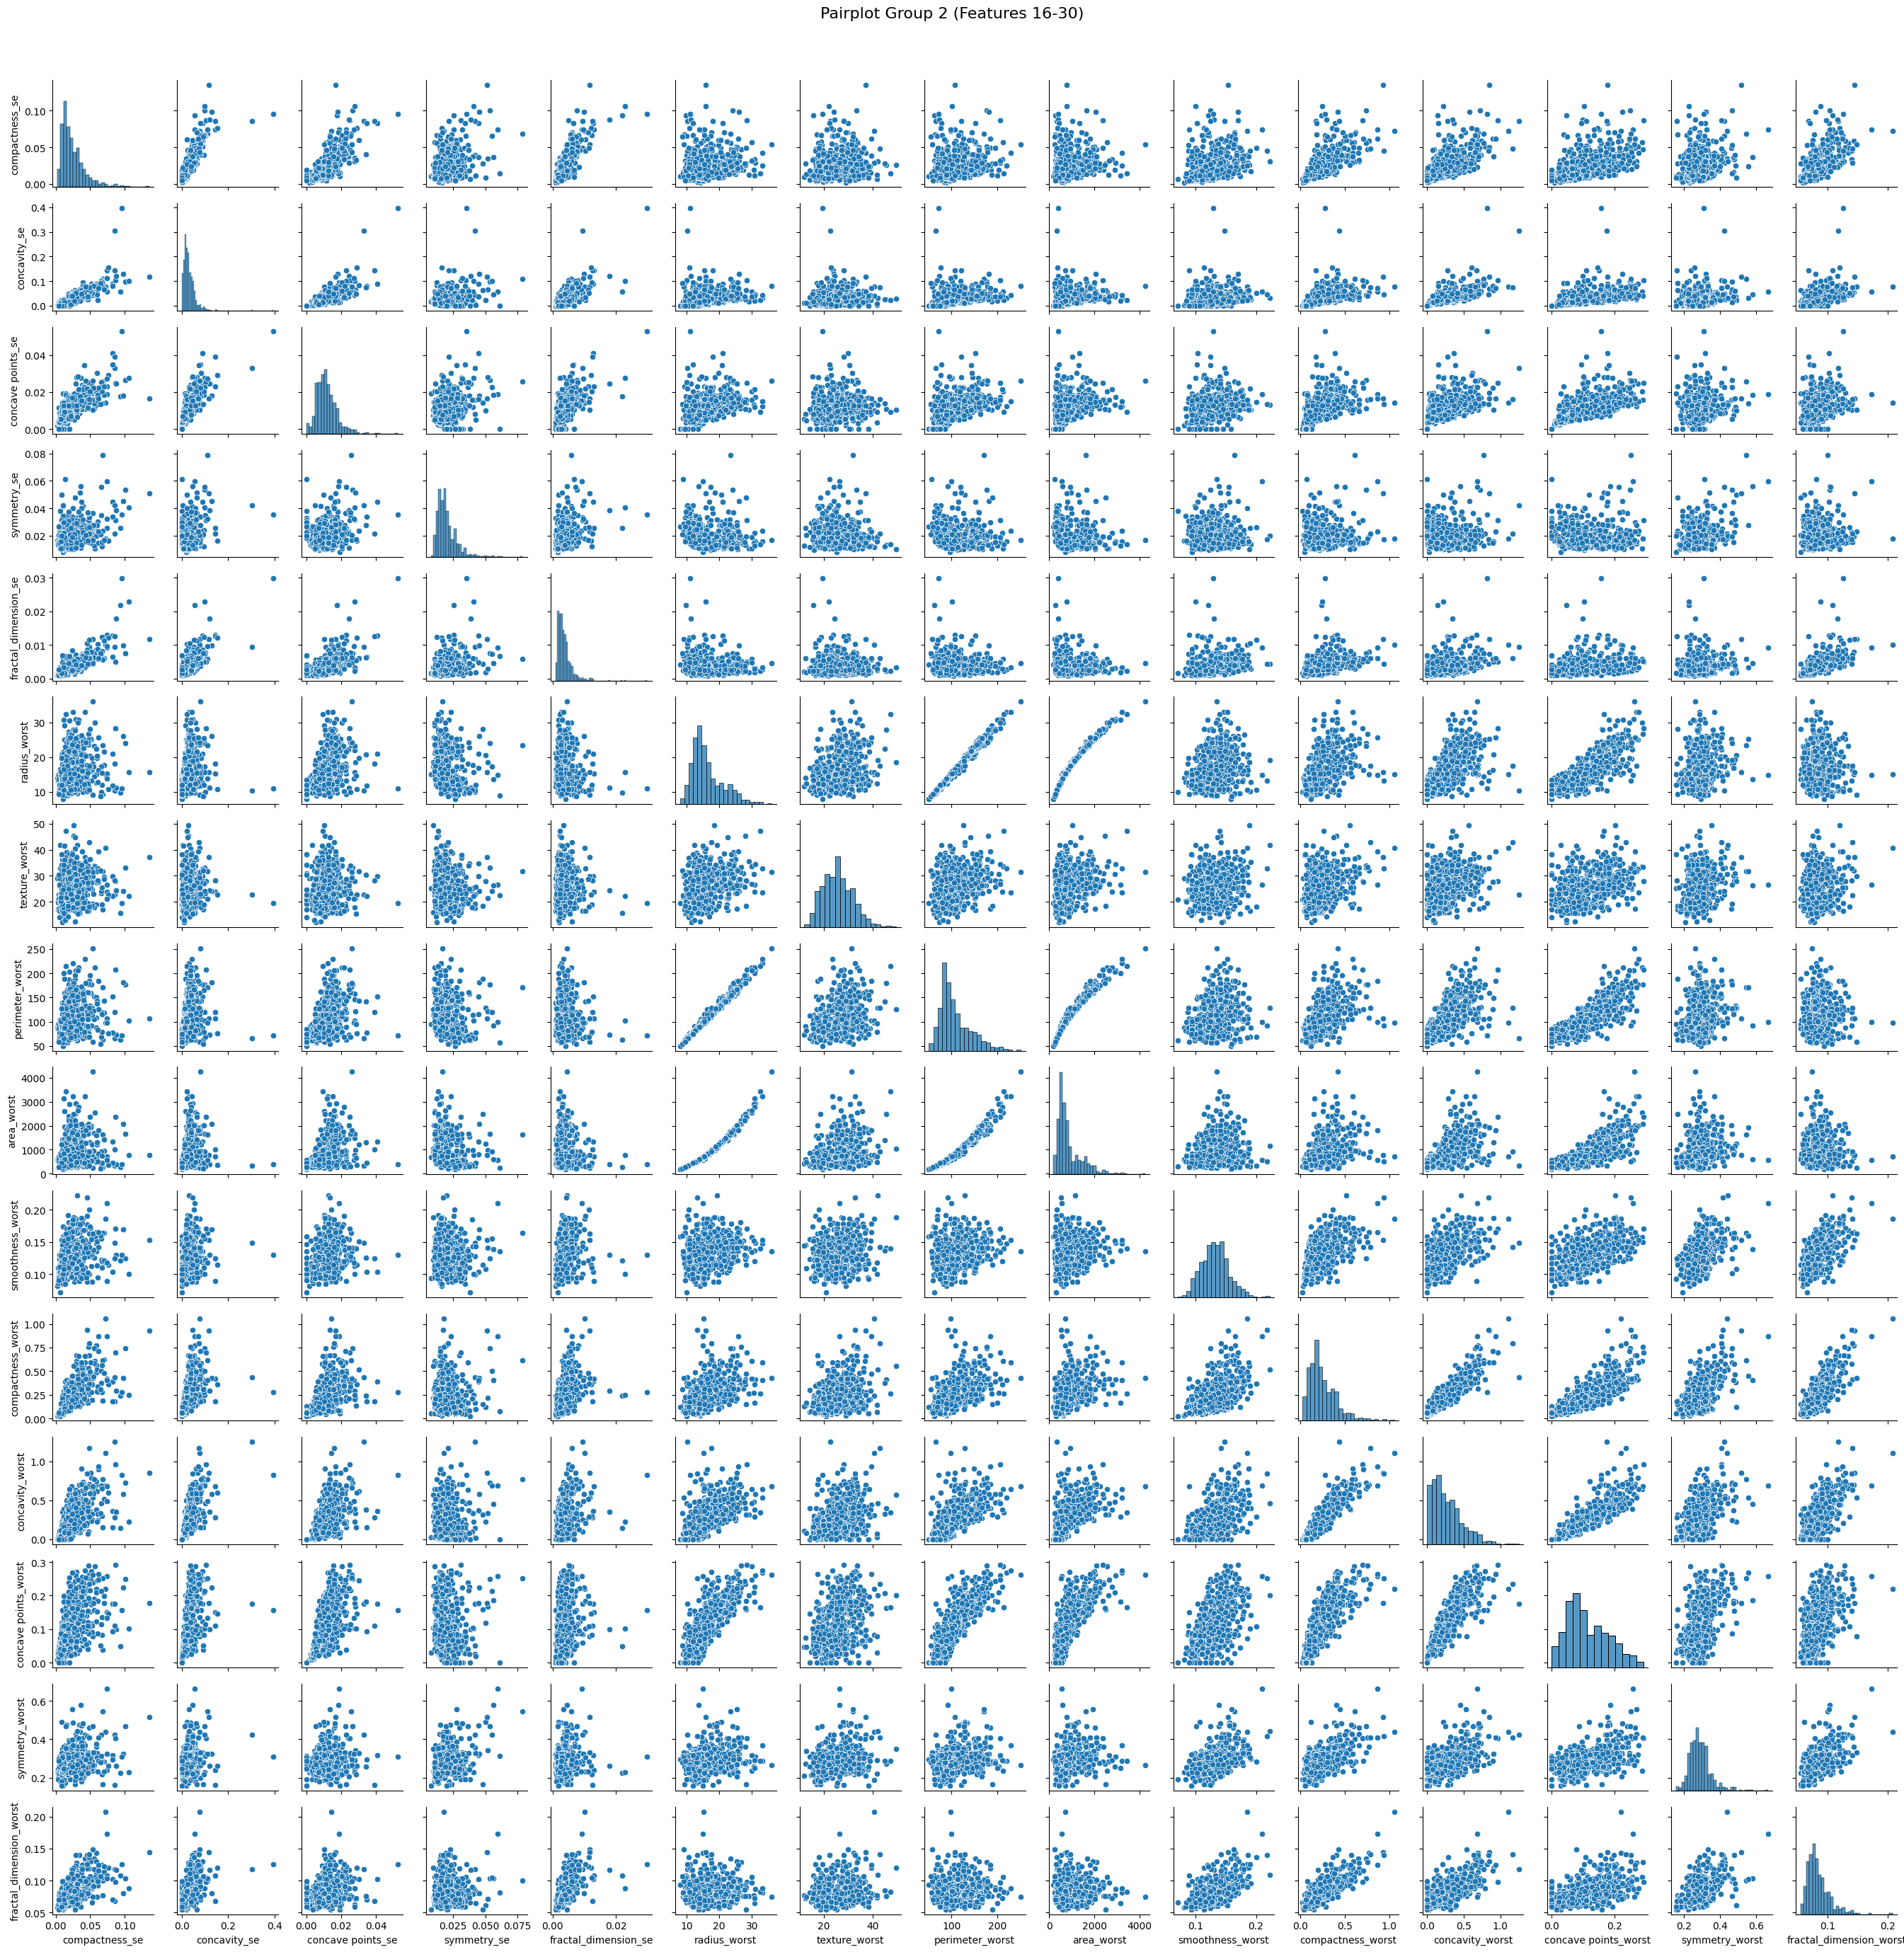

In [57]:
plt.figure(figsize=(20, 20))
g2 = sns.pairplot(dff[features_group2], height=1.8, corner=False)
plt.suptitle('Pairplot Group 2 (Features 16-30)', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

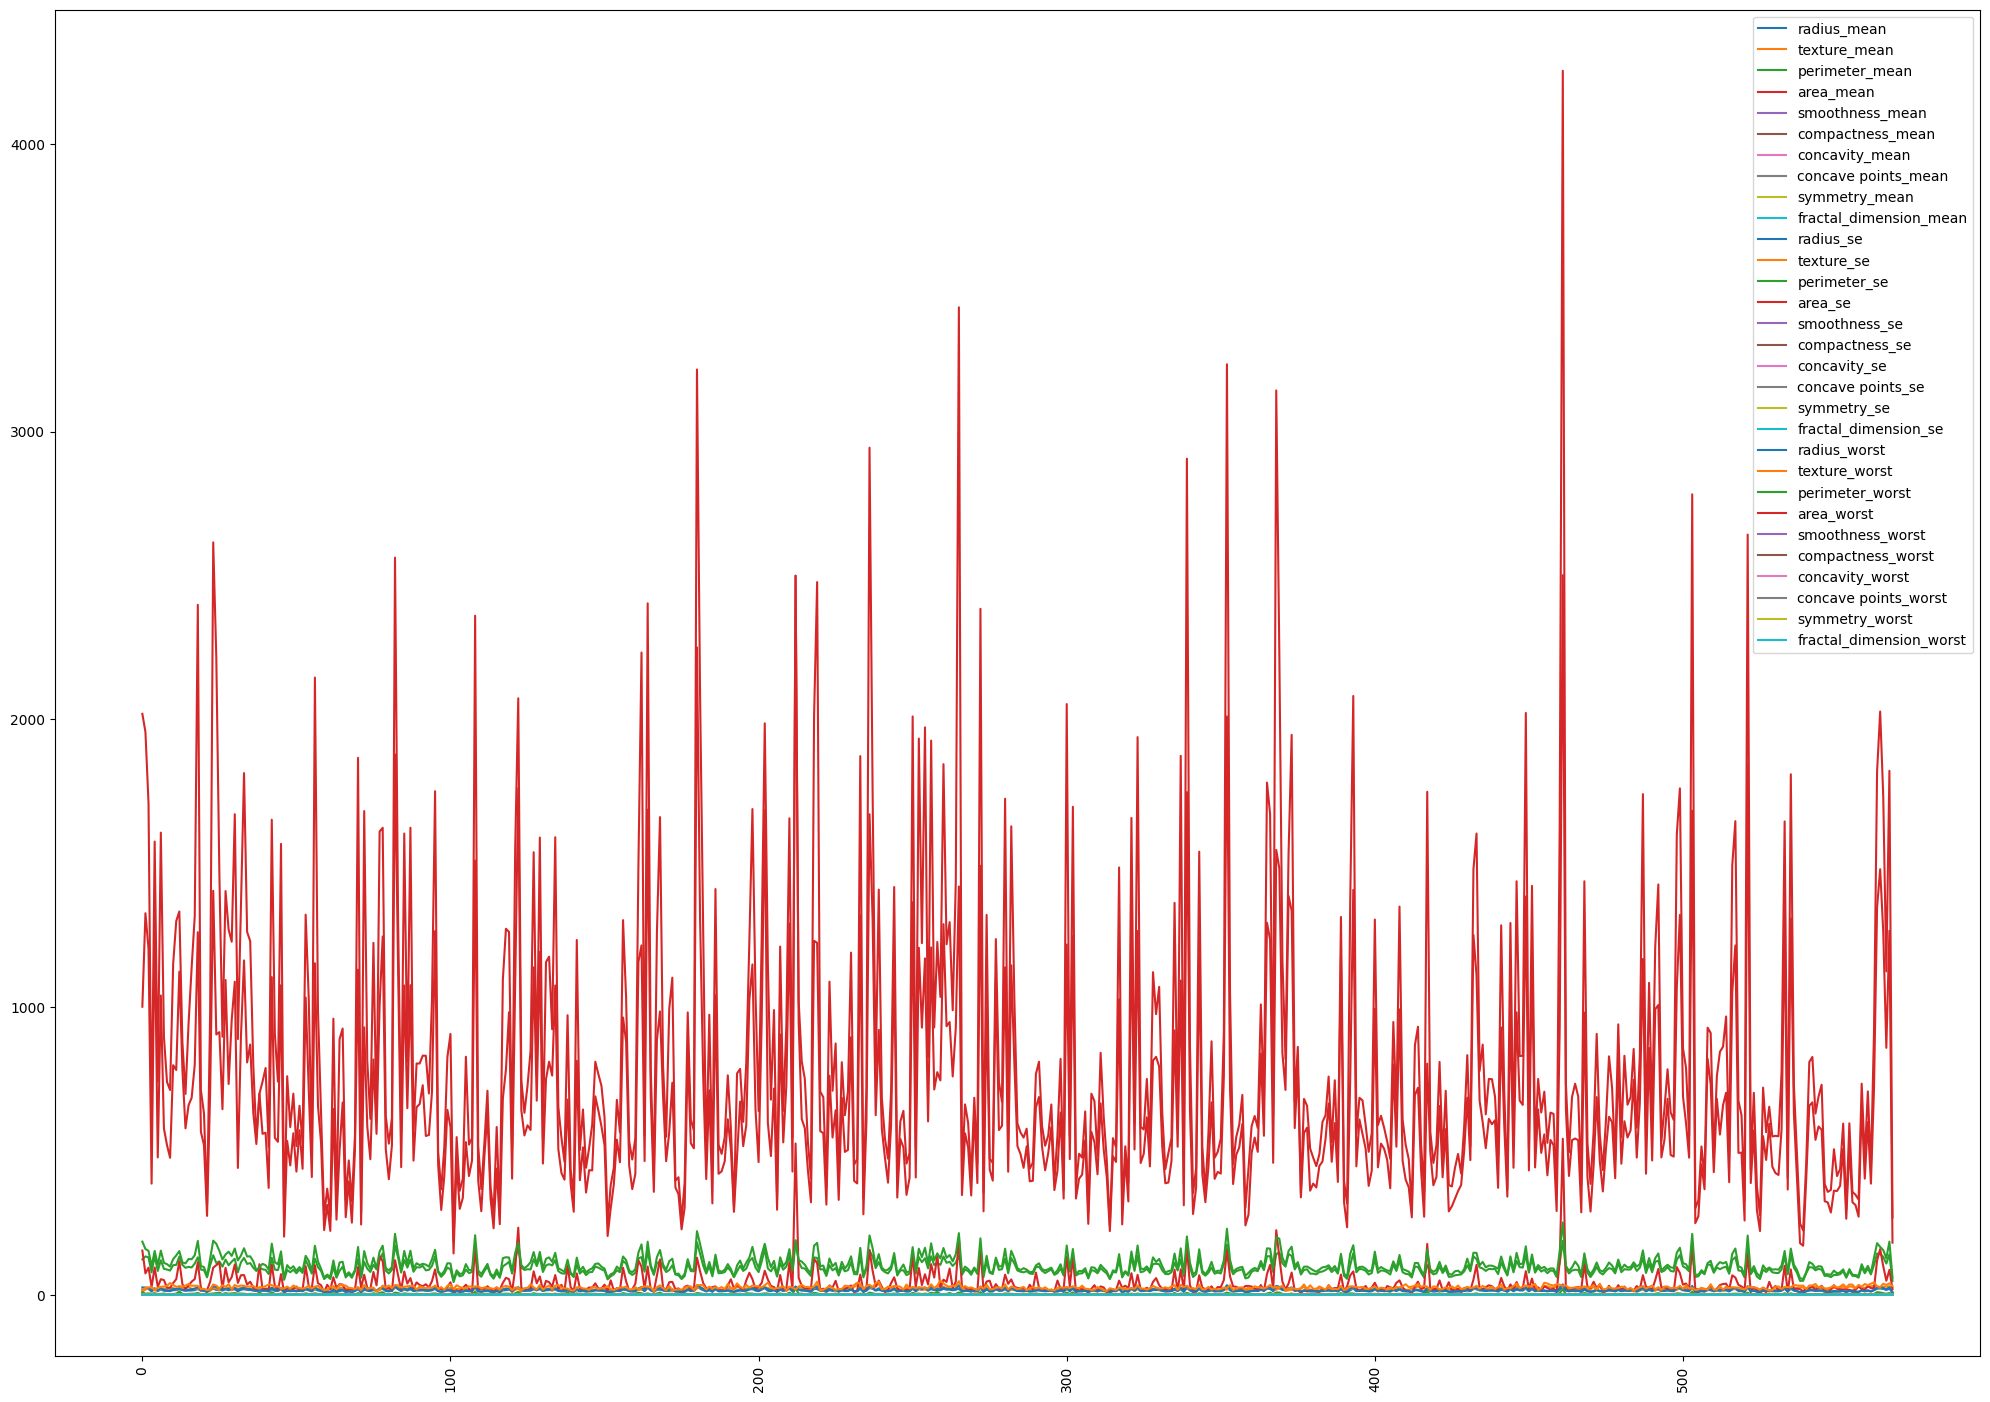

In [69]:
dff.drop(['diagnosis'], axis=1).plot(figsize=(20, 14))
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='count'>

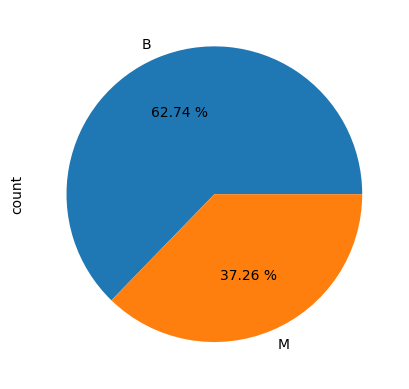

In [64]:
dff['diagnosis'].value_counts().plot(kind='pie', autopct = '%.2f %%')

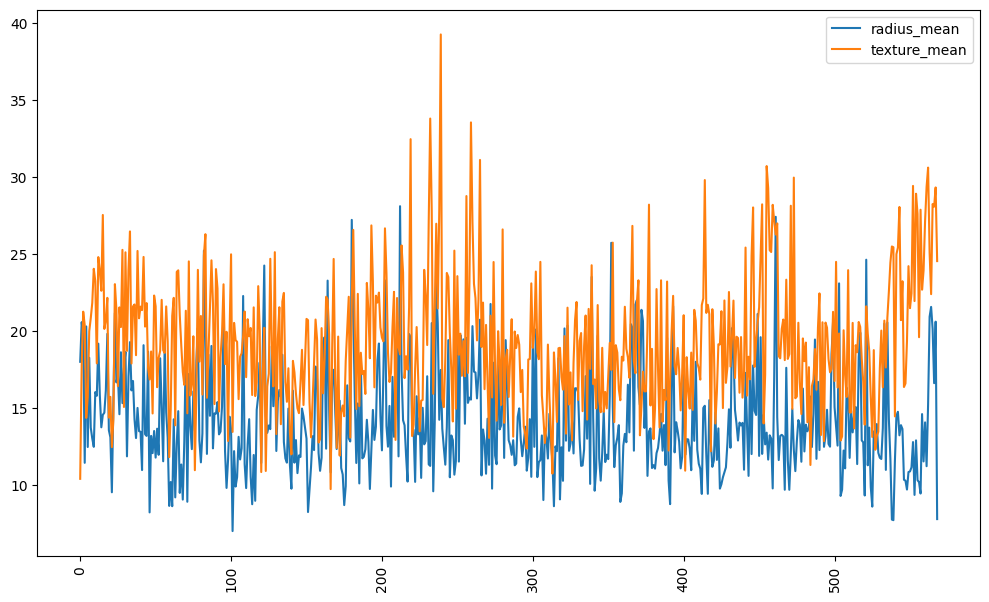

In [70]:
dff[['radius_mean','texture_mean']].plot(figsize=(10, 6))
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='diagnosis', ylabel='radius_mean'>

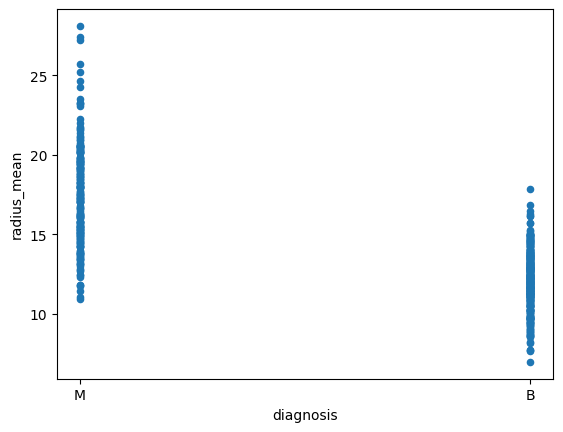

In [71]:
dff.plot(kind= 'scatter', x = 'diagnosis', y = 'radius_mean')

<Axes: xlabel='radius_mean', ylabel='radius_worst'>

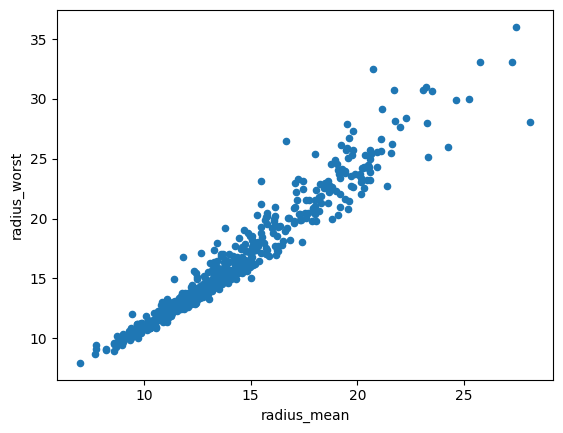

In [72]:
dff.plot(kind= 'scatter', x ='radius_mean', y = 'radius_worst')

<Axes: >

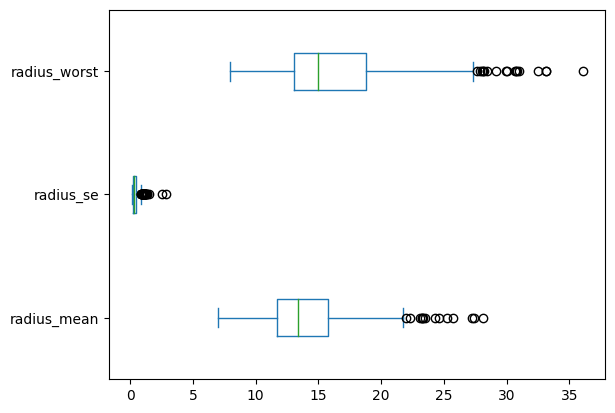

In [73]:
dff[['radius_mean','radius_se','radius_worst']].plot(kind = 'box', vert = False)

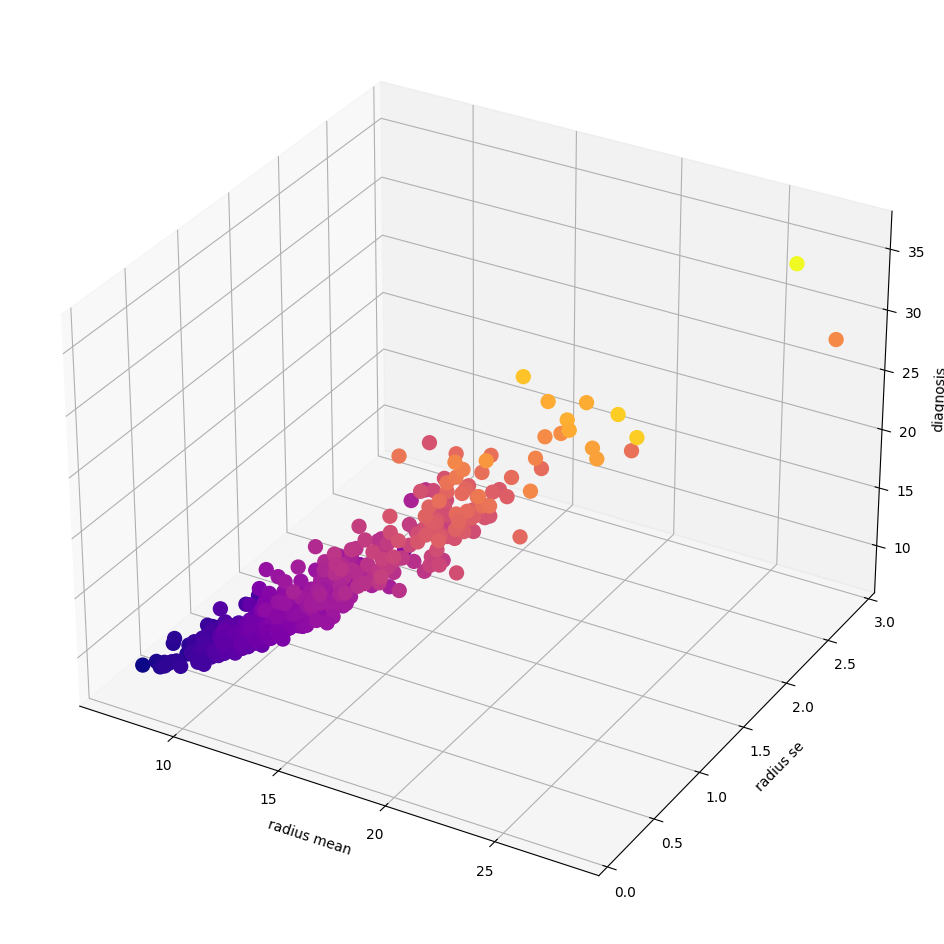

In [81]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

x = dff["radius_mean"]
y = dff["radius_se"]
z = dff["radius_worst"]

ax.scatter(x, y, z, c=z, cmap='plasma', s=100, alpha=1)

ax.set_xlabel("radius mean")
ax.set_ylabel("radius se")
ax.set_zlabel("diagnosis")

plt.show()

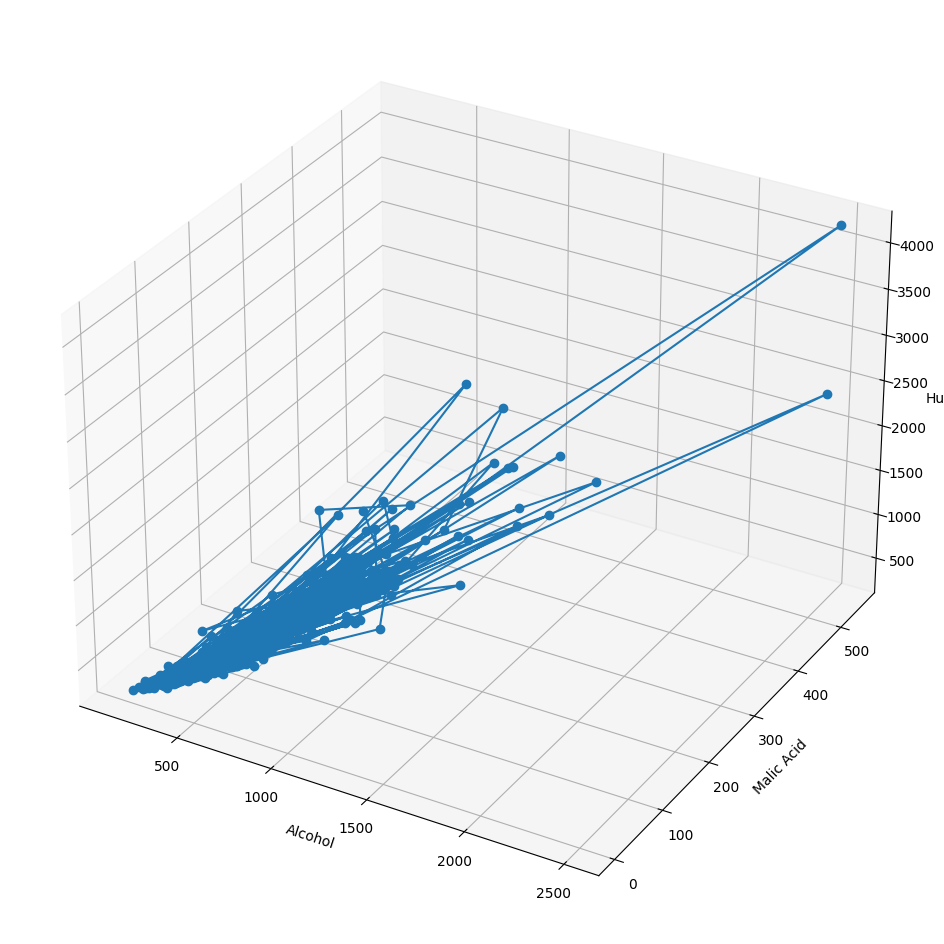

In [83]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

ax.plot(dff["area_mean"], dff["area_se"], dff["area_worst"], marker='o')

ax.set_xlabel("Alcohol")
ax.set_ylabel("Malic Acid")
ax.set_zlabel("Hue")

plt.show()

In [120]:
le = LabelBinarizer()
dff['diagnosis'] = le.fit_transform(dff['diagnosis'])

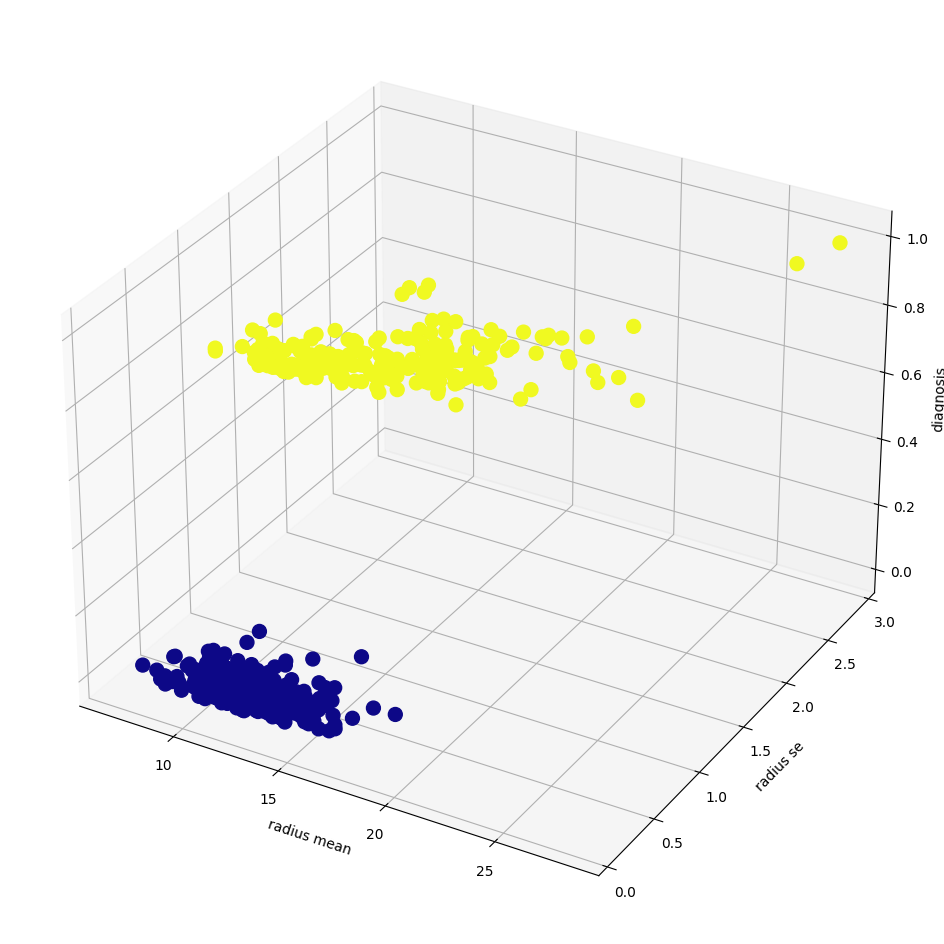

In [87]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')


x = dff["radius_mean"]
y = dff["radius_se"]
z = dff["diagnosis"]

ax.scatter(x, y, z, c=z, cmap='plasma', s=100, alpha=1)

ax.set_xlabel("radius mean")
ax.set_ylabel("radius se")
ax.set_zlabel("diagnosis")

plt.show()

In [89]:
alpha = 0.05 

normality_results = {}

for col in dff.select_dtypes(include=['number']).columns:  
    stat, p = stats.shapiro(dff[col].dropna()) 
    normal = "Tidak Normal" if p < alpha else "Normal"
    
    normality_results[col] = {"Statistik": stat, "p-value": p, "Keterangan": normal}

for col, result in normality_results.items():
    print(f"Uji Normalitas {col}: Statistik={result['Statistik']:.4f}, p-value={result['p-value']:.4f} -> {result['Keterangan']}")

Uji Normalitas diagnosis: Statistik=0.6125, p-value=0.0000 -> Tidak Normal
Uji Normalitas radius_mean: Statistik=0.9411, p-value=0.0000 -> Tidak Normal
Uji Normalitas texture_mean: Statistik=0.9767, p-value=0.0000 -> Tidak Normal
Uji Normalitas perimeter_mean: Statistik=0.9362, p-value=0.0000 -> Tidak Normal
Uji Normalitas area_mean: Statistik=0.8584, p-value=0.0000 -> Tidak Normal
Uji Normalitas smoothness_mean: Statistik=0.9875, p-value=0.0001 -> Tidak Normal
Uji Normalitas compactness_mean: Statistik=0.9170, p-value=0.0000 -> Tidak Normal
Uji Normalitas concavity_mean: Statistik=0.8668, p-value=0.0000 -> Tidak Normal
Uji Normalitas concave points_mean: Statistik=0.8916, p-value=0.0000 -> Tidak Normal
Uji Normalitas symmetry_mean: Statistik=0.9726, p-value=0.0000 -> Tidak Normal
Uji Normalitas fractal_dimension_mean: Statistik=0.9233, p-value=0.0000 -> Tidak Normal
Uji Normalitas radius_se: Statistik=0.7456, p-value=0.0000 -> Tidak Normal
Uji Normalitas texture_se: Statistik=0.8962, 

In [99]:
dff['diagnosis'].value_counts()
true_value = le.inverse_transform(dff['diagnosis'])
true_value_series = pd.Series(true_value)

print(dff['diagnosis'].value_counts())
print(true_value_series.value_counts())

diagnosis
0    357
1    212
Name: count, dtype: int64
B    357
M    212
Name: count, dtype: int64


In [124]:
dff =  dff.drop_duplicates()

In [125]:
dff = dff.dropna()

In [153]:
dff.shape

(569, 31)

In [144]:
outlier_detection = IsolationForest(contamination=0.01, random_state=42)

In [149]:
outlier_prediksi = outlier_detection.fit_predict(dff)

In [150]:
dff_clean = dff[outlier_prediksi == 1]

In [151]:
dff_clean.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [156]:
dff_normal = dff_clean
dff_normal.head(10)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   
5          1        12.45         15.70           82.57      477.1   
6          1        18.25         19.98          119.60     1040.0   
7          1        13.71         20.83           90.20      577.9   
8          1        13.00         21.82           87.50      519.8   
9          1        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010              0.14710   
1          0.08474           0.07864         0.08690              0.07017   
2          0.10960           0.15990         0.19740              0.12790   
3          0.14250           0.28390         0.24140              0.10520   
4          0.10030           0.13280         0.19800              0.10430   
5          0.12780           0.17000         0.15780              0.08089   
6          0.09463           0.10900         0.11270              0.07400   
7          0.11890           0.16450         0.09366              0.05985   
8          0.12730           0.19320         0.18590              0.09353   
9          0.11860           0.23960         0.22730              0.08543   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   
5         0.2087  ...         15.47          23.75           103.40   
6         0.1794  ...         22.88          27.66           153.20   
7         0.2196  ...         17.06          28.14           110.60   
8         0.2350  ...         15.49          30.73           106.20   
9         0.2030  ...         15.09          40.68            97.65   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   
5       741.6            0.1791             0.5249           0.5355   
6      1606.0            0.1442             0.2576           0.3784   
7       897.0            0.1654             0.3682           0.2678   
8       739.3            0.1703             0.5401           0.5390   
9       711.4            0.1853             1.0580           1.1050   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  
5                0.1741          0.3985                  0.12440  
6                0.1932          0.3063                  0.08368  
7                0.1556          0.3196                  0.11510  
8                0.2060          0.4378                  0.10720  
9                0.2210          0.4366                  0.20750  

[10 rows x 31 columns]

In [163]:
X = dff_normal.drop(columns=['diagnosis']) 
y = dff_normal['diagnosis'] 

yeo_johnson = PowerTransformer(method='yeo-johnson')


X_transformed = yeo_johnson.fit_transform(X)

dff_transformed = pd.DataFrame(X_transformed, columns=X.columns)

dff_transformed['diagnosis'] = y

print("Data setelah Yeo-Johnson Transform:")
print(dff_transformed.head())

Data setelah Yeo-Johnson Transform:
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.174864     -2.675972        1.307178   1.166884         1.539259   
1     1.680751     -0.259499        1.588994   1.698106        -0.814548   
2     1.518819      0.551727        1.511207   1.517102         0.987722   
3    -0.759865      0.361942       -0.513930  -0.837376         2.856609   
4     1.630312     -1.228617        1.646444   1.657258         0.358160   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          2.210346        1.913140             1.888255       2.012548   
1         -0.370439        0.318110             0.850809       0.115614   
2          1.195629        1.447081             1.721625       1.015836   
3          2.242683        1.689348             1.459347       2.436412   
4          0.789225        1.450945             1.447163       0.104124   

   fractal_dimension_mean  ...  texture_worst  perimeter

In [164]:
dff_transformed.head(10)

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.174864     -2.675972        1.307178   1.166884         1.539259   
1     1.680751     -0.259499        1.588994   1.698106        -0.814548   
2     1.518819      0.551727        1.511207   1.517102         0.987722   
3    -0.759865      0.361942       -0.513930  -0.837376         2.856609   
4     1.630312     -1.228617        1.646444   1.657258         0.358160   
5    -0.365369     -0.819792       -0.247298  -0.363330         2.084859   
6     1.230390      0.271981        1.211072   1.240625        -0.051036   
7     0.059956      0.461086        0.119897   0.051402         1.569380   
8    -0.172692      0.671941       -0.004949  -0.176169         2.056909   
9    -0.361761      1.112183       -0.176476  -0.368870         1.551323   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          2.210346        1.913140             1.888255       2.012548   
1         -0.370439        0.318110             0.850809       0.115614   
2          1.195629        1.447081             1.721625       1.015836   
3          2.242683        1.689348             1.459347       2.436412   
4          0.789225        1.450945             1.447163       0.104124   
5          1.325034        1.148962             1.069881       1.073090   
6          0.346166        0.676313             0.932948       0.046310   
7          1.255910        0.419398             0.605644       1.405123   
8          1.584583        1.369560             1.288871       1.834245   
9          1.978660        1.620069             1.153064       0.889328   

   fractal_dimension_mean  ...  texture_worst  perimeter_worst  area_worst  \
0                1.916297  ...      -1.486941         1.859078    1.692306   
1               -0.956565  ...      -0.288252         1.468505    1.649068   
2               -0.289225  ...       0.071013         1.357071    1.459958   
3                2.760871  ...       0.227449        -0.029288   -0.430730   
4               -0.509369  ...      -1.636345         1.351578    1.341545   
5                1.723267  ...      -0.228922         0.131888    0.090468   
6               -0.795538  ...       0.408588         1.369819    1.370093   
7                1.588327  ...       0.481755         0.365830    0.435399   
8                1.533636  ...       0.860023         0.225913    0.084661   
9                2.153347  ...       2.108099        -0.074753    0.012263   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0          1.286504           1.951549         1.756179              1.958682   
1         -0.323643          -0.286487         0.086869              1.122735   
2          0.582824           1.221741         1.027821              1.745503   
3          2.865457           2.288047         1.700846              1.885331   
4          0.286482          -0.121114         0.838654              0.827054   
5          1.893943           1.586712         1.305985              0.976142   
6          0.574516           0.295928         0.751162              1.208447   
7          1.405857           0.963143         0.230904              0.735340   
8          1.584619           1.633274         1.316448              1.355523   
9          2.103204           2.490887         2.383762              1.519670   

   symmetry_worst  fractal_dimension_worst  diagnosis  
0        2.192931                 1.729380        1.0  
1       -0.118241                 0.545302        1.0  
2        1.225117                 0.461750        1.0  
3        3.213801                 2.509195        1.0  
4       -0.949671                -0.276545        1.0  
5        1.645020                 1.864616        1.0  
6        0.439991                 0.218977        1.0  
7        0.650717                 1.624259        1.0  
8        2.012935                 1.370132        1.0  
9        2.002699            

In [171]:
alpha = 0.05 

normality_results = {}

for col in dff_transformed.select_dtypes(include=['number']).columns:  
    stat, p = stats.shapiro(dff_transformed[col].dropna()) 
    normal = "Tidak Normal" if p < alpha else "Normal"
    
    normality_results[col] = {"Statistik": stat, "p-value": p, "Keterangan": normal}

for col, result in normality_results.items():
    print(f"Uji Normalitas {col}: Statistik={result['Statistik']:.4f}, p-value={result['p-value']:.4f} -> {result['Keterangan']}")

Uji Normalitas radius_mean: Statistik=0.9922, p-value=0.0048 -> Tidak Normal
Uji Normalitas texture_mean: Statistik=0.9988, p-value=0.9773 -> Normal
Uji Normalitas perimeter_mean: Statistik=0.9922, p-value=0.0050 -> Tidak Normal
Uji Normalitas area_mean: Statistik=0.9918, p-value=0.0035 -> Tidak Normal
Uji Normalitas smoothness_mean: Statistik=0.9978, p-value=0.6740 -> Normal
Uji Normalitas compactness_mean: Statistik=0.9886, p-value=0.0002 -> Tidak Normal
Uji Normalitas concavity_mean: Statistik=0.9606, p-value=0.0000 -> Tidak Normal
Uji Normalitas concave points_mean: Statistik=0.9647, p-value=0.0000 -> Tidak Normal
Uji Normalitas symmetry_mean: Statistik=0.9979, p-value=0.7088 -> Normal
Uji Normalitas fractal_dimension_mean: Statistik=0.9978, p-value=0.6918 -> Normal
Uji Normalitas radius_se: Statistik=0.9811, p-value=0.0000 -> Tidak Normal
Uji Normalitas texture_se: Statistik=0.9976, p-value=0.6041 -> Normal
Uji Normalitas perimeter_se: Statistik=0.9903, p-value=0.0009 -> Tidak Nor

In [174]:
dff = dff_clean
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 563 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                563 non-null    int32  
 1   radius_mean              563 non-null    float64
 2   texture_mean             563 non-null    float64
 3   perimeter_mean           563 non-null    float64
 4   area_mean                563 non-null    float64
 5   smoothness_mean          563 non-null    float64
 6   compactness_mean         563 non-null    float64
 7   concavity_mean           563 non-null    float64
 8   concave points_mean      563 non-null    float64
 9   symmetry_mean            563 non-null    float64
 10  fractal_dimension_mean   563 non-null    float64
 11  radius_se                563 non-null    float64
 12  texture_se               563 non-null    float64
 13  perimeter_se             563 non-null    float64
 14  area_se                  563 no

In [179]:
alpha = 0.05

X_feature = dff.drop(['diagnosis'], axis=1)
X_OLS = sm.add_constant(X_feature)
y_OLS = dff['diagnosis'] 

X_OLS = X_OLS.dropna()
y_OLS = y_OLS.loc[X_OLS.index]

model_OLS = sm.OLS(y_OLS, X_OLS).fit()

f_statistic = model_OLS.fvalue
f_pvalue = model_OLS.f_pvalue
r_squared = model_OLS.rsquared

keterangan_f = "Tolak H0: Model signifikan (minimal ada 1 fitur berpengaruh)" if f_pvalue < alpha else "Gagal Tolak H0: Model tidak signifikan"

print("\nHasil Analisis Regresi OLS:")
print(f"F-statistic: {f_statistic:.4f}")
print(f"p-value (F-test): {f_pvalue:.4f}")
print(f"Koefisien Determinasi (R-squared): {r_squared:.4f}")
print(f"Kesimpulan F-test: {keterangan_f}")

print("\nKoefisien dan Signifikansi Variabel:")
for var in X_feature.columns:
    coef = model_OLS.params[var]
    pval = model_OLS.pvalues[var]
    signif = "Signifikan" if pval < alpha else "Tidak signifikan"
    print(f"{var}: koef={coef:.4f}, p-value={pval:.4f} -> {signif}")

print("\nRingkasan Lengkap Model:")
print(model_OLS.summary())


Hasil Analisis Regresi OLS:
F-statistic: 61.3542
p-value (F-test): 0.0000
Koefisien Determinasi (R-squared): 0.7758
Kesimpulan F-test: Tolak H0: Model signifikan (minimal ada 1 fitur berpengaruh)

Koefisien dan Signifikansi Variabel:
radius_mean: koef=-0.1600, p-value=0.3629 -> Tidak signifikan
texture_mean: koef=0.0027, p-value=0.7386 -> Tidak signifikan
perimeter_mean: koef=0.0113, p-value=0.6557 -> Tidak signifikan
area_mean: koef=0.0006, p-value=0.3181 -> Tidak signifikan
smoothness_mean: koef=1.5972, p-value=0.4398 -> Tidak signifikan
compactness_mean: koef=-4.2866, p-value=0.0016 -> Signifikan
concavity_mean: koef=2.0962, p-value=0.0502 -> Tidak signifikan
concave points_mean: koef=1.1256, p-value=0.5729 -> Tidak signifikan
symmetry_mean: koef=0.0672, p-value=0.9279 -> Tidak signifikan
fractal_dimension_mean: koef=0.2610, p-value=0.9626 -> Tidak signifikan
radius_se: koef=0.4389, p-value=0.2860 -> Tidak signifikan
texture_se: koef=-0.0193, p-value=0.6125 -> Tidak signifikan
peri

In [202]:
residuals_squared = model_OLS.resid ** 2

bp_test = het_breuschpagan(model_OLS.resid, model_OLS.model.exog)

alpha = 0.05
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
result = dict(zip(labels, bp_test))

print(f"LM Statistic: {result['Lagrange multiplier statistic']:.4f}")
print(f"p-value: {result['p-value']:.4f}")
print(f"F-statistic: {result['f-value']:.4f}")
print(f"F p-value: {result['f p-value']:.4f}")

if result['p-value'] < alpha:
    print("\nKesimpulan: Tolak H0 - Terdapat bukti heteroskedastisitas (p = {:.4f})".format(result['p-value']))
else:
    print("\nKesimpulan: Gagal tolak H0 - Tidak ada bukti heteroskedastisitas (p = {:.4f})".format(result['p-value']))

print("\n[Catatan]")
print("1. Jika terdeteksi heteroskedastisitas, pertimbangkan:")
print("   - Transformasi variabel dependen (log, sqrt)")
print("   - Model WLS (Weighted Least Squares)")
print("   - Error standar robust (Huber-White)")

LM Statistic: 65.1472
p-value: 0.0002
F-statistic: 2.3205
F p-value: 0.0001

Kesimpulan: Tolak H0 - Terdapat bukti heteroskedastisitas (p = 0.0002)

[Catatan]
1. Jika terdeteksi heteroskedastisitas, pertimbangkan:
   - Transformasi variabel dependen (log, sqrt)
   - Model WLS (Weighted Least Squares)
   - Error standar robust (Huber-White)


In [186]:
alpha = 0.05 
var_equal = True

benign = dff[dff['diagnosis'] == 0]['area_worst'].dropna() 
malignant = dff[dff['diagnosis'] == 1]['area_worst'].dropna()

shapiro_benign = stats.shapiro(benign)
shapiro_malignant = stats.shapiro(malignant)

levene_test = stats.levene(benign, malignant)

t_stat, p_value = stats.ttest_ind(benign, malignant, 
                                equal_var=var_equal,
                                alternative='two-sided') 

mean_benign = np.mean(benign)
mean_malignant = np.mean(malignant)
std_benign = np.std(benign, ddof=1)
std_malignant = np.std(malignant, ddof=1)
n_benign = len(benign)
n_malignant = len(malignant)


if p_value < alpha:
    keterangan = "Tolak H0: Ada perbedaan signifikan secara statistik"
    effect_size = abs(mean_benign - mean_malignant)/np.sqrt((std_benign**2 + std_malignant**2)/2)
else:
    keterangan = "Gagal tolak H0: Tidak ada bukti perbedaan signifikan"
    effect_size = 0

print(f"Variabel yang diuji: 'area_worst'")
print(f"\n[Deskripsi Kelompok]")
print(f"Tumor jinak (n={n_benign}): Mean = {mean_benign:.2f}, SD = {std_benign:.2f}")
print(f"Tumor ganas (n={n_malignant}): Mean = {mean_malignant:.2f}, SD = {std_malignant:.2f}")

print(f"\n[Uji Normalitas Shapiro-Wilk]")
print(f"Tumor jinak: Statistik = {shapiro_benign.statistic:.4f}, p-value = {shapiro_benign.pvalue:.4f}")
print(f"Tumor ganas: Statistik = {shapiro_malignant.statistic:.4f}, p-value = {shapiro_malignant.pvalue:.4f}")

print(f"\n[Uji Kesamaan Varians Levene]")
print(f"Statistik = {levene_test.statistic:.4f}, p-value = {levene_test.pvalue:.4f}")

print(f"\n[Hasil Uji T-Test]")
print(f"Statistik t = {t_stat:.4f}")
print(f"Derajat kebebasan (df) = {n_benign + n_malignant - 2}")
print(f"p-value = {p_value:.4f}")
print(f"Kesimpulan: {keterangan} (α = {alpha})")

print(f"\n[Ukuran Efek]")
print(f"Cohen's d = {effect_size:.4f}")
print("Interpretasi Cohen's d:")
print("0.20 = efek kecil, 0.50 = efek medium, 0.80 = efek besar")

print("\n[Catatan]")
print("1. Pastikan asumsi normalitas dan homogenitas varians terpenuhi")
print("2. Untuk ukuran sampel besar (>30), uji t umumnya robust terhadap pelanggaran normalitas")
print("3. Pertimbangkan uji non-parametrik Mann-Whitney U jika asumsi tidak terpenuhi")

Variabel yang diuji: 'area_worst'

[Deskripsi Kelompok]
Tumor jinak (n=356): Mean = 559.40, SD = 163.56
Tumor ganas (n=207): Mean = 1396.17, SD = 560.93

[Uji Normalitas Shapiro-Wilk]
Tumor jinak: Statistik = 0.9895, p-value = 0.0118
Tumor ganas: Statistik = 0.9295, p-value = 0.0000

[Uji Kesamaan Varians Levene]
Statistik = 209.7397, p-value = 0.0000

[Hasil Uji T-Test]
Statistik t = -26.3033
Derajat kebebasan (df) = 561
p-value = 0.0000
Kesimpulan: Tolak H0: Ada perbedaan signifikan secara statistik (α = 0.05)

[Ukuran Efek]
Cohen's d = 2.0253
Interpretasi Cohen's d:
0.20 = efek kecil, 0.50 = efek medium, 0.80 = efek besar

[Catatan]
1. Pastikan asumsi normalitas dan homogenitas varians terpenuhi
2. Untuk ukuran sampel besar (>30), uji t umumnya robust terhadap pelanggaran normalitas
3. Pertimbangkan uji non-parametrik Mann-Whitney U jika asumsi tidak terpenuhi


In [178]:
vif_data = pd.DataFrame()
vif_data["Variabel"] = X_feature.columns
vif_data["VIF"] = [variance_inflation_factor(X_feature.values, i) for i in range(X_feature.shape[1])]

def interpret_vif(vif):
    if vif < 5:
        return "Tidak ada masalah multikolinearitas"
    elif 5 <= vif < 10:
        return "Indikasi multikolinearitas"
    else:
        return "Multikolinearitas tinggi (perlu perhatian)"

vif_data["Keterangan"] = vif_data["VIF"].apply(interpret_vif)

print(vif_data)

                   Variabel           VIF  \
0               radius_mean  63751.642211   
1              texture_mean    254.757519   
2            perimeter_mean  58480.267090   
3                 area_mean   1490.502517   
4           smoothness_mean    410.417411   
5          compactness_mean    202.002062   
6            concavity_mean    149.710550   
7       concave points_mean    148.353451   
8             symmetry_mean    183.115837   
9    fractal_dimension_mean    649.262518   
10                radius_se    355.616163   
11               texture_se     25.784861   
12             perimeter_se    236.448320   
13                  area_se    160.950828   
14            smoothness_se     29.583943   
15           compactness_se     71.374200   
16             concavity_se     45.578660   
17        concave points_se     63.154324   
18              symmetry_se     37.190659   
19     fractal_dimension_se     33.522133   
20             radius_worst  12184.975481   
21        

In [181]:
group1 = dff[dff['diagnosis'] == 0]['radius_se'].dropna()
group2 = dff[dff['diagnosis'] == 1]['radius_se'].dropna()

bartlett_test = stats.bartlett(group1, group2)

statistik = bartlett_test.statistic
p_value = bartlett_test.pvalue 

if p_value < alpha:
    keterangan = "Tolak H0: Varians berbeda signifikan (heteroskedastisitas)"
else:
    keterangan = "Gagal tolak H0: Tidak ada bukti varians berbeda (homoskedastisitas)"

print("\nHasil Uji Bartlett untuk Kesamaan Varians:")
print(f"Variabel yang diuji: radius_se (standard error radius)")
print(f"Statistik Bartlett: {statistik:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"Kesimpulan: {keterangan}")
print(f"Jumlah sampel - Tumor jinak: {len(group1)}, Tumor ganas: {len(group2)}")
print(f"Varians - Tumor jinak: {group1.var():.4f}, Tumor ganas: {group2.var():.4f}")


Hasil Uji Bartlett untuk Kesamaan Varians:
Variabel yang diuji: radius_se (standard error radius)
Statistik Bartlett: 216.4772
p-value: 0.0000
Kesimpulan: Tolak H0: Varians berbeda signifikan (heteroskedastisitas)
Jumlah sampel - Tumor jinak: 356, Tumor ganas: 207
Varians - Tumor jinak: 0.0119, Tumor ganas: 0.0717


In [183]:
alpha = 0.05 

def mardias_test(data):
    n, p = data.shape
    mean = data.mean(axis=0)
    cov = data.cov()
    inv_cov = np.linalg.inv(cov)
    centered_data = data - mean
    skewness = np.sum(np.dot(centered_data, inv_cov) ** 3) / n
    kurtosis = np.sum(np.dot(centered_data, inv_cov) ** 4) / n
    return skewness, kurtosis

numerical_data = X_feature.select_dtypes(include=[np.number])

skewness, kurtosis = mardias_test(numerical_data)

p = numerical_data.shape[1]
df_skewness = p * (p + 1) * (p + 2) / 6
expected_kurtosis = p * (p + 2)

interpretasi_skewness = "Data tidak normal multivariat (tolak H0)" if skewness > stats.chi2.ppf(1-alpha, df_skewness) else "Tidak ada bukti untuk menolak normalitas multivariat (gagal tolak H0)"

interpretasi_kurtosis = "Data tidak normal multivariat (tolak H0)" if abs(kurtosis - expected_kurtosis) > 2*np.sqrt(8*p*(p+2)/len(numerical_data)) else "Tidak ada bukti untuk menolak normalitas multivariat (gagal tolak H0)"

print("\nHasil Uji Normalitas Multivariat Mardia:")
print(f"Jumlah observasi (n): {len(numerical_data)}")
print(f"Jumlah variabel (p): {p}")
print(f"\nKoefisien Skewness Mardia: {skewness:.4f}")
print(f"Nilai kritis Chi-square (α=0.05, df={df_skewness:.0f}): {stats.chi2.ppf(1-alpha, df_skewness):.4f}")
print(f"Interpretasi Skewness: {interpretasi_skewness}")
print(f"\nKoefisien Kurtosis Mardia: {kurtosis:.4f}")
print(f"Nilai harapan kurtosis: {expected_kurtosis:.4f}")
print(f"Interpretasi Kurtosis: {interpretasi_kurtosis}")
print(f"\nCatatan:")
print("1. Uji ini sensitif terhadap ukuran sampel besar")
print("2. Untuk dataset besar, pertimbangkan juga uji normalitas univariat untuk tiap variabel")
print("3. Jika normalitas tidak terpenuhi, pertimbangkan transformasi data atau metode non-parametrik")


Hasil Uji Normalitas Multivariat Mardia:
Jumlah observasi (n): 563
Jumlah variabel (p): 30

Koefisien Skewness Mardia: 4083240365.0014
Nilai kritis Chi-square (α=0.05, df=4960): 5124.9552
Interpretasi Skewness: Data tidak normal multivariat (tolak H0)

Koefisien Kurtosis Mardia: 72189882292133.5000
Nilai harapan kurtosis: 960.0000
Interpretasi Kurtosis: Data tidak normal multivariat (tolak H0)

Catatan:
1. Uji ini sensitif terhadap ukuran sampel besar
2. Untuk dataset besar, pertimbangkan juga uji normalitas univariat untuk tiap variabel
3. Jika normalitas tidak terpenuhi, pertimbangkan transformasi data atau metode non-parametrik


In [194]:
print(result)

{'Statistik': 0.6085196733474731, 'p-value': 1.331986352543824e-33, 'Keterangan': 'Tidak Normal'}


In [195]:
manova = MANOVA.from_formula('area_se + radius_mean ~ diagnosis', data=dff.dropna())
print(manova.mv_test())

print("Variabel Dependen: area_se, radius_mean")
print(f"Jumlah Observasi: {len(dff)}")
print("\nUji Multivariat:")

alpha = 0.05
if result['Statistik'] < alpha:
    print("\nKesimpulan: Tolak H0 - Ada perbedaan signifikan secara multivariat antara kelompok diagnosis")
else:
    print("\nKesimpulan: Gagal tolak H0 - Tidak ada perbedaan signifikan secara multivariat")

print(result)

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0423 2.0000 560.0000 6344.8429 0.0000
         Pillai's trace  0.9577 2.0000 560.0000 6344.8429 0.0000
 Hotelling-Lawley trace 22.6602 2.0000 560.0000 6344.8429 0.0000
    Roy's greatest root 22.6602 2.0000 560.0000 6344.8429 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
         diagnosis        Value  Num DF  Den DF  F Value  Pr > F
----------------------------------------------------------------
            Wilks' lambda 0.4450 2.0000 560.0000 349.1657 0.0000
           Pillai's trace 0.5550 2.0000 560.0

In [201]:
alpha = 0.05

benign = dff[dff['diagnosis'] == 0]['radius_se'].dropna()  
malignant = dff[dff['diagnosis'] == 1]['radius_se'].dropna() 

f_stat, p_value = stats.f_oneway(benign, malignant)

mean_benign = np.mean(benign)
mean_malignant = np.mean(malignant)
std_benign = np.std(benign, ddof=1)
std_malignant = np.std(malignant, ddof=1)
n_benign = len(benign)
n_malignant = len(malignant)

if p_value < alpha:
    keterangan = "Tolak H0: Ada perbedaan signifikan secara statistik"
    effect_size = (mean_benign - mean_malignant) / np.sqrt((std_benign**2 + std_malignant**2)/2)
else:
    keterangan = "Gagal tolak H0: Tidak ada perbedaan signifikan"
    effect_size = 0

print(f"Variabel yang diuji: 'radius_se'")
print(f"\n[Deskripsi Kelompok]")
print(f"Tumor jinak (n={n_benign}): Mean = {mean_benign:.4f}, SD = {std_benign:.4f}")
print(f"Tumor ganas (n={n_malignant}): Mean = {mean_malignant:.4f}, SD = {std_malignant:.4f}")

print(f"\n[Hasil Uji ANOVA]")
print(f"F-statistik = {f_stat:.4f}")
print(f"p-value = {p_value:.4f}")
print(f"Kesimpulan: {keterangan} (α = {alpha})")

print(f"\n[Ukuran Efek]")
print(f"Cohen's d = {abs(effect_size):.4f}")
print("Interpretasi Cohen's d:")
print("0.20 = efek kecil, 0.50 = efek medium, 0.80 = efek besar")

print("\n[Catatan Penting]")
print("1. Untuk dua kelompok, ANOVA setara dengan uji-t independen (F = t²)")
print("2. Pastikan asumsi normalitas dan homogenitas varians terpenuhi")
print("3. Jika asumsi tidak terpenuhi, pertimbangkan uji Kruskal-Wallis")

Variabel yang diuji: 'radius_se'

[Deskripsi Kelompok]
Tumor jinak (n=356): Mean = 0.2826, SD = 0.1090
Tumor ganas (n=207): Mean = 0.5798, SD = 0.2677

[Hasil Uji ANOVA]
F-statistik = 341.8290
p-value = 0.0000
Kesimpulan: Tolak H0: Ada perbedaan signifikan secara statistik (α = 0.05)

[Ukuran Efek]
Cohen's d = 1.4544
Interpretasi Cohen's d:
0.20 = efek kecil, 0.50 = efek medium, 0.80 = efek besar

[Catatan Penting]
1. Untuk dua kelompok, ANOVA setara dengan uji-t independen (F = t²)
2. Pastikan asumsi normalitas dan homogenitas varians terpenuhi
3. Jika asumsi tidak terpenuhi, pertimbangkan uji Kruskal-Wallis


In [210]:
kmo_all, kmo_model = calculate_kmo(dff[['area_se', 'area_worst', 'diagnosis']].dropna())
print(f"KMO: {kmo_model}")

print("\nInterpretasi KMO Overall:")

if kmo_model >= 0.90:
    print("Kecukupan sampel SANGAT BAIK untuk analisis faktor")
elif kmo_model >= 0.80:
    print("Kecukupan sampel BAIK untuk analisis faktor")
elif kmo_model >= 0.70:
    print("Kecukupan sampel CUKUP untuk analisis faktor")
elif kmo_model >= 0.60:
    print("Kecukupan sampel MINIMAL untuk analisis faktor")
else:
    print("Kecukupan sampel TIDAK MEMADAI untuk analisis faktor")
    
print("\nRekomendasi:")
if kmo_model < 0.60:
    print("1. Pertimbangkan untuk menambah sampel")
    print("2. Periksa variabel dengan KMO individual rendah (<0.50)")
    print("3. Pertimbangkan metode analisis alternatif")

KMO: 0.6854502189763259

Interpretasi KMO Overall:
Kecukupan sampel MINIMAL untuk analisis faktor

Rekomendasi:


In [211]:
contingency_table = pd.crosstab(dff['diagnosis'], dff['perimeter_mean'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test: Chi2={chi2}, p-value={p}")

print(f"\nChi-Square Test:")
print(f"Chi2 Statistic = {chi2:.4f}")
print(f"p-value = {p:.4f}")
print(f"Degrees of Freedom = {dof}")
print("\nContingency Table:")
print(contingency_table)

alpha = 0.05
print(f"\nKesimpulan: {'Tolak H0: Ada hubungan signifikan' if p < alpha else 'Gagal tolak H0: Tidak ada hubungan signifikan'}")

Chi-Square Test: Chi2=547.2286860627115, p-value=0.1650749919344598

Chi-Square Test:
Chi2 Statistic = 547.2287
p-value = 0.1651
Degrees of Freedom = 516

Contingency Table:
perimeter_mean  43.79   47.92   47.98   48.34   51.71   53.27   54.09   \
diagnosis                                                                
0                    1       1       1       1       1       1       1   
1                    0       0       0       0       0       0       0   

perimeter_mean  54.34   54.42   54.53   ...  147.20  147.30  152.10  153.50  \
diagnosis                               ...                                   
0                    1       1       1  ...       0       0       0       0   
1                    0       0       0  ...       1       1       2       1   

perimeter_mean  155.10  158.90  165.50  171.50  174.20  182.10  
diagnosis                                                       
0                    0       0       0       0       0       0  
1                

================================================================================================================================================================

In [9]:
dff = pd.read_csv(r"C:\Users\Robyi\Documents\Data Science Dataset\cancer.csv")
dff.head(5)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [10]:
dff = dff.drop(['id','Unnamed: 32'], axis =1)
dff.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [256]:
dff.drop_duplicates(inplace=True)
dff.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [11]:
dff.dropna(inplace=True)
dff.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [12]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [13]:
X = dff.drop(columns=['diagnosis'])
y = dff['diagnosis']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.35, random_state=42, stratify=y)

In [15]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

In [16]:
numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])

In [17]:
categorical_transformer = Pipeline([
    ('le', LabelBinarizer())
])

In [18]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [19]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('fs',SelectKBest(score_func=f_classif)),
    ('logit', LogisticRegression(
        class_weight='balanced',
        random_state=42
    ))
])

In [20]:
param_grid = {
    'logit__C' :[0.01, 1, 10],
    'logit__solver':['liblinear', 'saga'],
    'logit__penalty': ['l1', 'l2'],
    'fs__k':[10,15,20]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=model,
param_grid=param_grid,
scoring='accuracy',
cv=cv,
n_jobs=-1
)

grid_search.fit(X_train, y_train)
print("Best Parameter:",grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameter: {'fs__k': 20, 'logit__C': 1, 'logit__penalty': 'l2', 'logit__solver': 'liblinear'}
Best Score: 0.9783783783783783


In [21]:
best_params = {
    'fs__k': 20,
    'logit__C': 1,
    'logit__penalty': 'l2',
    'logit__solver': 'liblinear'
}

def objective(trial):
    C = trial.suggest_float('logit__C', 0.1, 10, log=True) 
    k = trial.suggest_int('fs__k', 5, X_train.shape[1]) 
    
    model.set_params(
        fs__k=k,
        logit__C=C,
        logit__penalty=best_params['logit__penalty'],
        logit__solver=best_params['logit__solver']
    )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [22]:
study = optuna.create_study(
    direction='maximize',
    sampler=TPESampler(seed=42))
    
study.optimize(objective, n_trials = 100)

print("\nBest parameters from Optuna:")
print(study.best_params)
print(f"Best accuracy: {study.best_value:.4f}")

[I 2025-04-01 04:51:06,787] A new study created in memory with name: no-name-c9ad06d1-3e2d-4a1b-b494-f79f7dc64780
[I 2025-04-01 04:51:06,858] Trial 0 finished with value: 0.975 and parameters: {'logit__C': 0.5611516415334505, 'fs__k': 29}. Best is trial 0 with value: 0.975.
[I 2025-04-01 04:51:06,879] Trial 1 finished with value: 0.965 and parameters: {'logit__C': 2.9106359131330697, 'fs__k': 20}. Best is trial 0 with value: 0.975.
[I 2025-04-01 04:51:06,902] Trial 2 finished with value: 0.96 and parameters: {'logit__C': 0.20513382630874505, 'fs__k': 9}. Best is trial 0 with value: 0.975.
[I 2025-04-01 04:51:06,974] Trial 3 finished with value: 0.985 and parameters: {'logit__C': 0.13066739238053282, 'fs__k': 27}. Best is trial 3 with value: 0.985.
[I 2025-04-01 04:51:06,997] Trial 4 finished with value: 0.965 and parameters: {'logit__C': 1.5930522616241019, 'fs__k': 23}. Best is trial 3 with value: 0.985.
[I 2025-04-01 04:51:07,054] Trial 5 finished with value: 0.985 and parameters: {'


Best parameters from Optuna:
{'logit__C': 0.13066739238053282, 'fs__k': 27}
Best accuracy: 0.9850


In [23]:
model.set_params(**study.best_params)
model.fit(X_train, y_train)
final_accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"\nFinal Test Accuracy: {final_accuracy:.4f}")


Final Test Accuracy: 0.9850


In [25]:
probabilities = model.predict_proba(X_test)
print(probabilities)

[[8.20603655e-04 9.99179396e-01]
 [9.11328340e-01 8.86716601e-02]
 [1.72321538e-06 9.99998277e-01]
 [9.97595664e-01 2.40433576e-03]
 [4.79918539e-02 9.52008146e-01]
 [9.94740586e-01 5.25941443e-03]
 [4.58530990e-02 9.54146901e-01]
 [8.75756220e-01 1.24243780e-01]
 [3.45587929e-02 9.65441207e-01]
 [9.40917253e-01 5.90827469e-02]
 [5.81394831e-03 9.94186052e-01]
 [1.28907204e-03 9.98710928e-01]
 [1.60005407e-01 8.39994593e-01]
 [9.84029685e-01 1.59703152e-02]
 [2.73990506e-04 9.99726009e-01]
 [9.88293751e-01 1.17062486e-02]
 [9.88839914e-01 1.11600863e-02]
 [1.98403310e-05 9.99980160e-01]
 [3.15078970e-01 6.84921030e-01]
 [9.98631484e-01 1.36851649e-03]
 [9.79406132e-01 2.05938683e-02]
 [1.04317446e-01 8.95682554e-01]
 [9.93957003e-01 6.04299729e-03]
 [9.69708545e-02 9.03029145e-01]
 [9.36673447e-01 6.33265526e-02]
 [9.84264935e-01 1.57350654e-02]
 [1.04294568e-03 9.98957054e-01]
 [8.75168487e-01 1.24831513e-01]
 [8.92391343e-01 1.07608657e-01]
 [9.93918517e-01 6.08148289e-03]
 [9.762052

In [27]:
y_pred = model.predict(X_test)

Text(113.9222222222222, 0.5, 'true value')

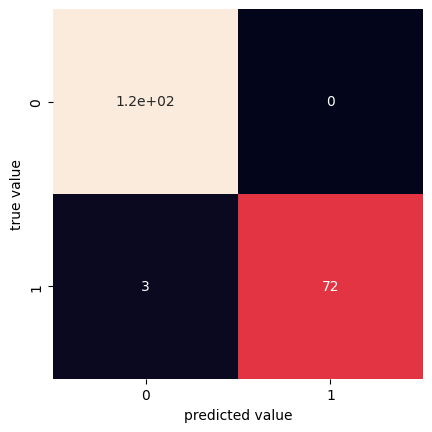

In [28]:
matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(matrix, square  =True, annot = True, cbar = False)
plt.xlabel('predicted value')
plt.ylabel('true value')

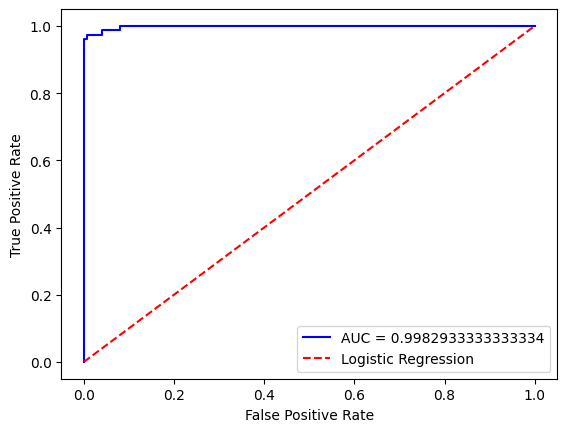

In [31]:
prob_estimate = model.predict_proba(X_test)

fpr, tpr, threshhold = roc_curve(y_test, prob_estimate[:,1], pos_label ="M")
nilai_auc = auc(fpr,tpr)

plt.plot(fpr, tpr,'b',label = f'AUC = {nilai_auc}')
plt.plot([0,1],[0,1], 'r--', label='Logistic Regression')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

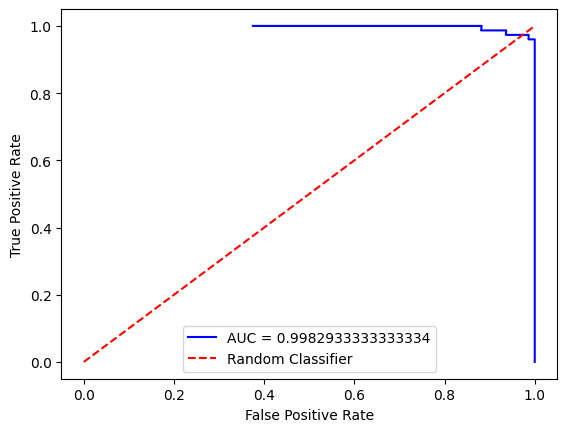

In [33]:
precision, recall, _ = precision_recall_curve(y_test, prob_estimate[:,1], pos_label ="M")
pr_auc = auc(recall,precision)

plt.plot(precision, recall,'b',label = f'AUC = {nilai_auc}')
plt.plot([0,1],[0,1], 'r--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [36]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.985

Classification Report:
              precision    recall  f1-score   support

           B       0.98      1.00      0.99       125
           M       1.00      0.96      0.98        75

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



In [38]:
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.98648649 0.97297297 0.97297297 0.98648649 0.98630137]
Mean CV Accuracy: 0.9810440577563865


In [45]:
fs = model.named_steps['fs']
preprocessor = model.named_steps['preprocessor']
logit = model.named_steps['logit']

X_preprocessed = preprocessor.transform(X)

mask = fs.get_support()
selected_indices = np.where(mask)[0]

feature_names_preprocessed = None
if hasattr(preprocessor, 'get_feature_names_out'):
    feature_names_preprocessed = preprocessor.get_feature_names_out()
else:
    feature_names_preprocessed = [f'feature_{i}' for i in range(X_preprocessed.shape[1])]

selected_feature_names = [feature_names_preprocessed[i] for i in selected_indices]

Fitur yang terpilih:
                         Feature       Score  Selected
27     num__concave points_worst  591.444458      True
22          num__perimeter_worst  582.525561      True
20             num__radius_worst  556.699080      True
7       num__concave points_mean  541.782255      True
23               num__area_worst  436.998506      True
2            num__perimeter_mean  429.591539      True
0               num__radius_mean  397.704421      True
3                 num__area_mean  355.585196      True
6            num__concavity_mean  291.589377      True
26          num__concavity_worst  242.801975      True
5          num__compactness_mean  194.246496      True
10                num__radius_se  177.379309      True
25        num__compactness_worst  176.445478      True
13                  num__area_se  173.574143      True
12             num__perimeter_se  166.243628      True
21            num__texture_worst   97.051567      True
24         num__smoothness_worst   90.459845

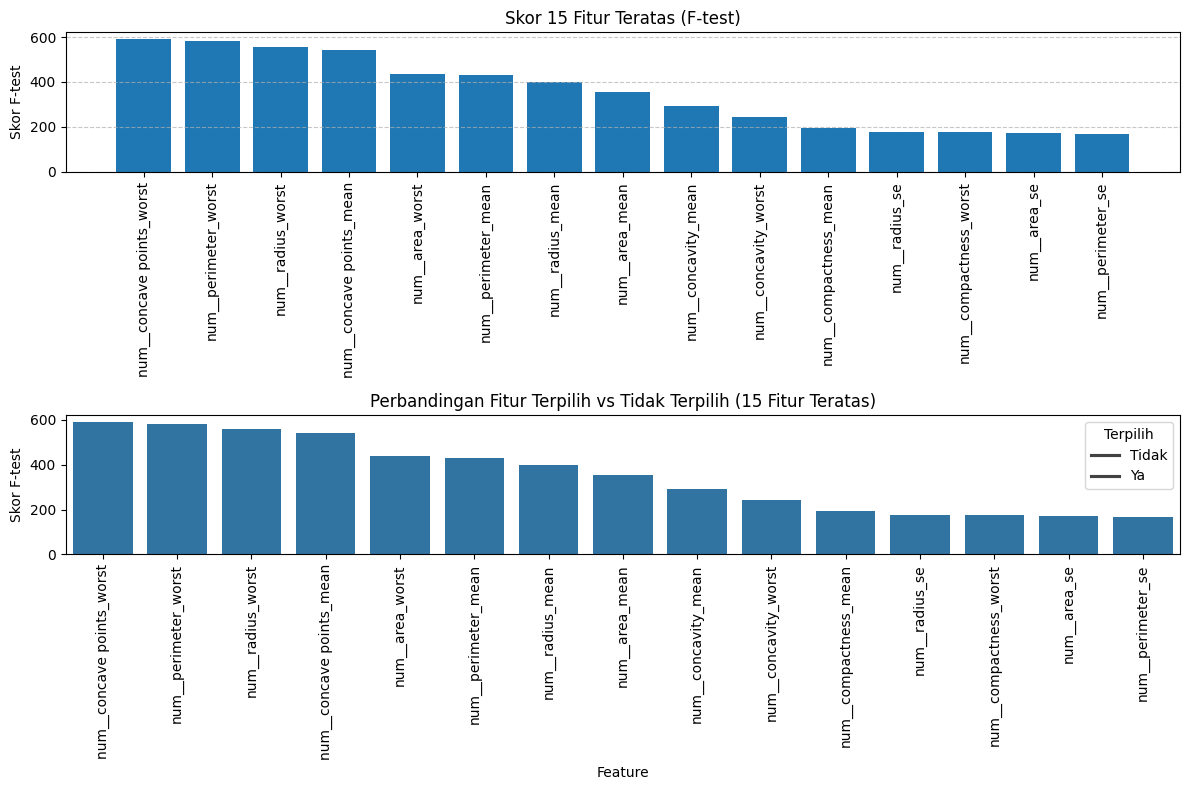

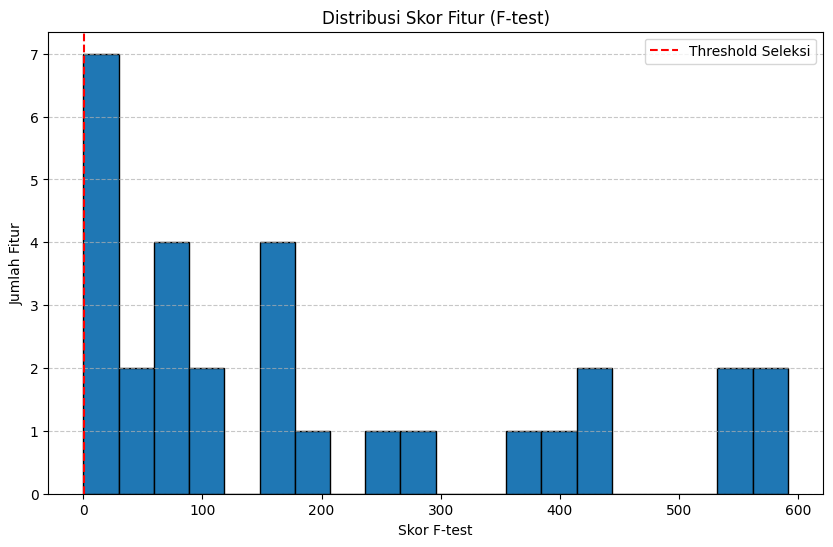

In [49]:
fs = model.named_steps['fs']
preprocessor = model.named_steps['preprocessor']

X_preprocessed = preprocessor.transform(X)

selected_mask = fs.get_support()
selected_indices = np.where(selected_mask)[0]

feature_scores = fs.scores_

feature_names = None
if hasattr(preprocessor, 'get_feature_names_out'):
    feature_names = preprocessor.get_feature_names_out()
else:
    feature_names = [f'feature_{i}' for i in range(X_preprocessed.shape[1])]

feature_selection_results = pd.DataFrame({
    'Feature': feature_names,
    'Score': feature_scores,
    'Selected': selected_mask
})

feature_selection_results = feature_selection_results.sort_values('Score', ascending=False)

selected_features = feature_selection_results[feature_selection_results['Selected']]
print("Fitur yang terpilih:")
print(selected_features)

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.bar(feature_selection_results['Feature'][:15], 
        feature_selection_results['Score'][:15])
plt.xticks(rotation=90)
plt.title('Skor 15 Fitur Teratas (F-test)')
plt.ylabel('Skor F-test')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(2, 1, 2)
sns.barplot(x='Feature', y='Score', hue='Selected', 
            data=feature_selection_results.head(15))
plt.xticks(rotation=90)
plt.title('Perbandingan Fitur Terpilih vs Tidak Terpilih (15 Fitur Teratas)')
plt.ylabel('Skor F-test')
plt.legend(title='Terpilih', labels=['Tidak', 'Ya'])

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(feature_scores, bins=20, edgecolor='black')
plt.axvline(x=feature_scores[selected_indices].min(), color='red', 
            linestyle='--', label='Threshold Seleksi')
plt.title('Distribusi Skor Fitur (F-test)')
plt.xlabel('Skor F-test')
plt.ylabel('Jumlah Fitur')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

if len(selected_indices) < 20: 
    X_selected = X_preprocessed[:, selected_mask]
    selected_names = [feature_names[i] for i in selected_indices]
    
    corr_matrix = np.corrcoef(X_selected, rowvar=False)
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', 
                xticklabels=selected_names, yticklabels=selected_names)
    plt.title('Korelasi Antar Fitur yang Terpilih')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

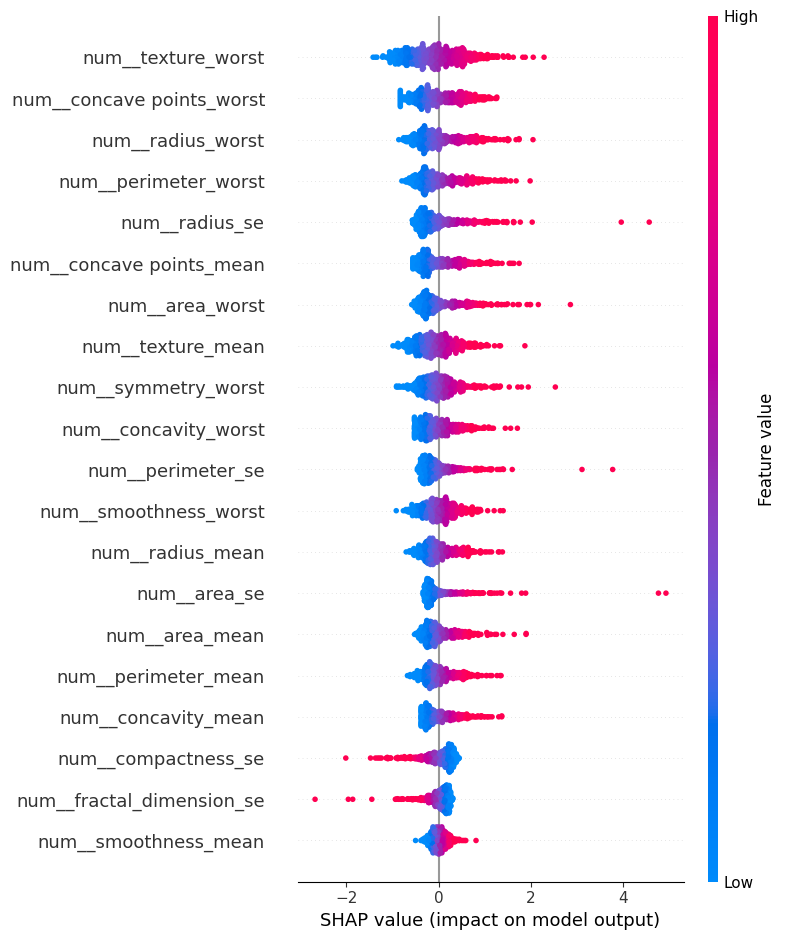

In [46]:
X_preprocessed = preprocessor.transform(X)

X_selected = fs.transform(X_preprocessed)

explainer = shap.LinearExplainer(logit, X_selected)

shap_values = explainer.shap_values(X_selected)

shap.summary_plot(shap_values, X_selected, feature_names=selected_feature_names)

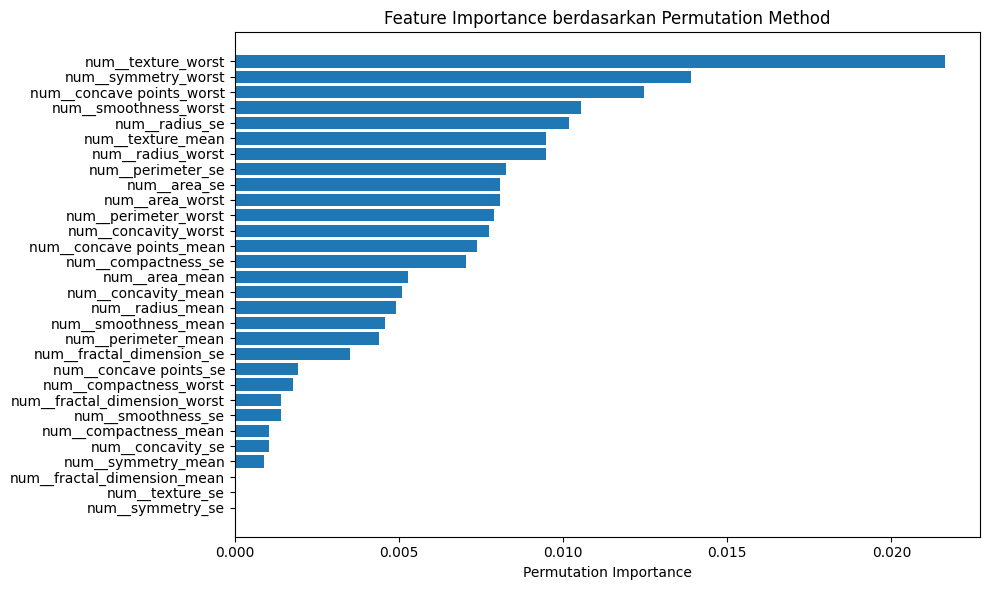

In [53]:
result = permutation_importance(model, X, y, n_repeats=10, random_state=42)
importance = result.importances_mean

preprocessor = model.named_steps['preprocessor']
if hasattr(preprocessor, 'get_feature_names_out'):
    feature_names = preprocessor.get_feature_names_out()
else:
    feature_names = [f'feature_{i}' for i in range(X.shape[1])]
    
sorted_idx = np.argsort(importance)
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance berdasarkan Permutation Method')
plt.tight_layout()
plt.show()

In [56]:
majority_class_ratio = max(np.mean(y_test == 1), np.mean(y_test == 0))
accuracy = accuracy_score(y_test, y_pred)
successes = sum(y_test == y_pred) 
n = len(y_test)  
z_stat, p_value = proportions_ztest(count=successes, nobs=n, value=majority_class_ratio, alternative='larger')

print(f"Accuracy (ACC): {accuracy:.4f}")
print(f"No Information Rate (NIR): {majority_class_ratio:.4f}")
print(f"P value [ACC > NIR]: {p_value:.4f}")

Accuracy (ACC): 0.9850
No Information Rate (NIR): 0.0000
P value [ACC > NIR]: 0.0000


In [61]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

Sensitivity (Recall): 0.9600
Specificity: 1.0000


In [68]:
fpr, tpr, thresholds = roc_curve(y_test, prob_estimate[:,1], pos_label ="M")

print(f"Sensitivity (TPR): {tpr}")
print(f"Specificity (TNR): {1 - fpr}")

Sensitivity (TPR): [0.         0.01333333 0.96       0.96       0.97333333 0.97333333
 0.98666667 0.98666667 1.         1.        ]
Specificity (TNR): [1.    1.    1.    0.992 0.992 0.96  0.96  0.92  0.92  0.   ]


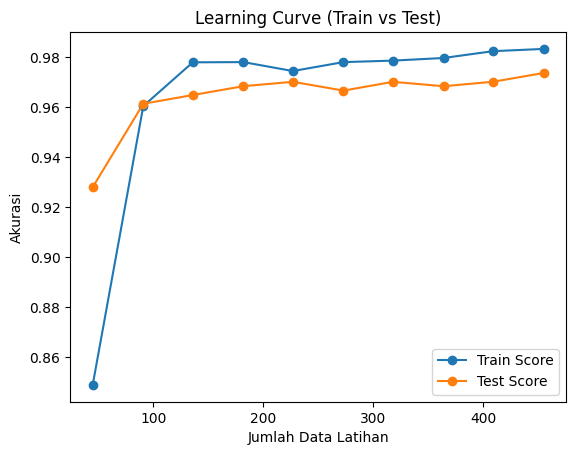

In [71]:
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=cv, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Train Score", marker="o")
plt.plot(train_sizes, test_mean, label="Test Score", marker="o")
plt.xlabel("Jumlah Data Latihan")
plt.ylabel("Akurasi")
plt.legend()
plt.title("Learning Curve (Train vs Test)")
plt.show()

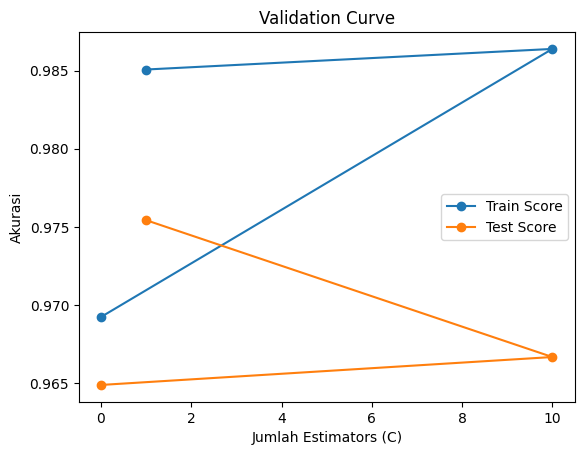

In [79]:
param_range = [0.01,10,1]
train_scores, test_scores = validation_curve(
    model, X, y, param_range=param_range, param_name="logit__C",
    cv=5, scoring="accuracy"
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(param_range, train_mean, label="Train Score", marker="o")
plt.plot(param_range, test_mean, label="Test Score", marker="o")
plt.xlabel("Jumlah Estimators (C)")
plt.ylabel("Akurasi")
plt.legend()
plt.title("Validation Curve")
plt.show()

In [81]:
def simple_kappa_with_ci(y_test, y_pred):
    kappa = cohen_kappa_score(y_test, y_pred)
    
    n = len(y_test)
    var_kappa = (1 - kappa) / (n * (1 - 0.5)**2)
    se_kappa = np.sqrt(var_kappa)
    
    z = 1.96
    lower_bound = kappa - z * se_kappa
    upper_bound = kappa + z * se_kappa
    
    return kappa, (lower_bound, upper_bound)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

kappa, ci = simple_kappa_with_ci(y_test, y_pred)

print(f"Cohen's Kappa: {kappa:.4f}")
print(f"95% CI: ({ci[0]:.4f}, {ci[1]:.4f})")

Cohen's Kappa: 0.9243
95% CI: (0.8481, 1.0006)


In [84]:
y_prob = model.predict_proba(X_test)[:, 1]
y_true = y_test 

brier_score = brier_score_loss(y_true, y_prob, pos_label="M")
print("Brier Score:", brier_score)

Brier Score: 0.022046164498637975


In [86]:
prob_true, prob_pred = calibration_curve(y_true, y_prob, n_bins=10, pos_label="M")

ece = np.abs(prob_true - prob_pred).mean()
print("ECE:", ece)

ECE: 0.17905832947662748


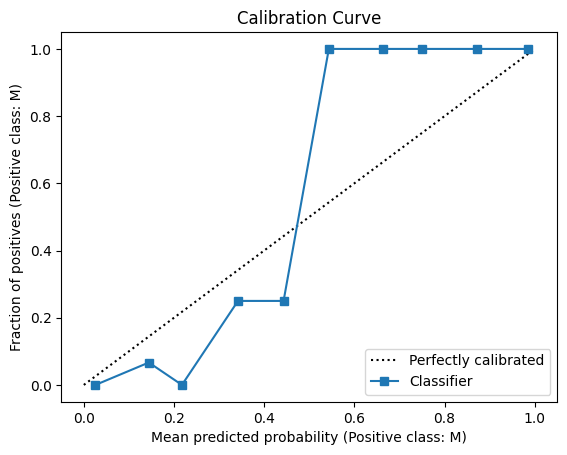

In [87]:
fig, ax = plt.subplots()
CalibrationDisplay.from_predictions(y_true, y_prob, n_bins=10, ax=ax, pos_label="M")
plt.title("Calibration Curve")
plt.show()

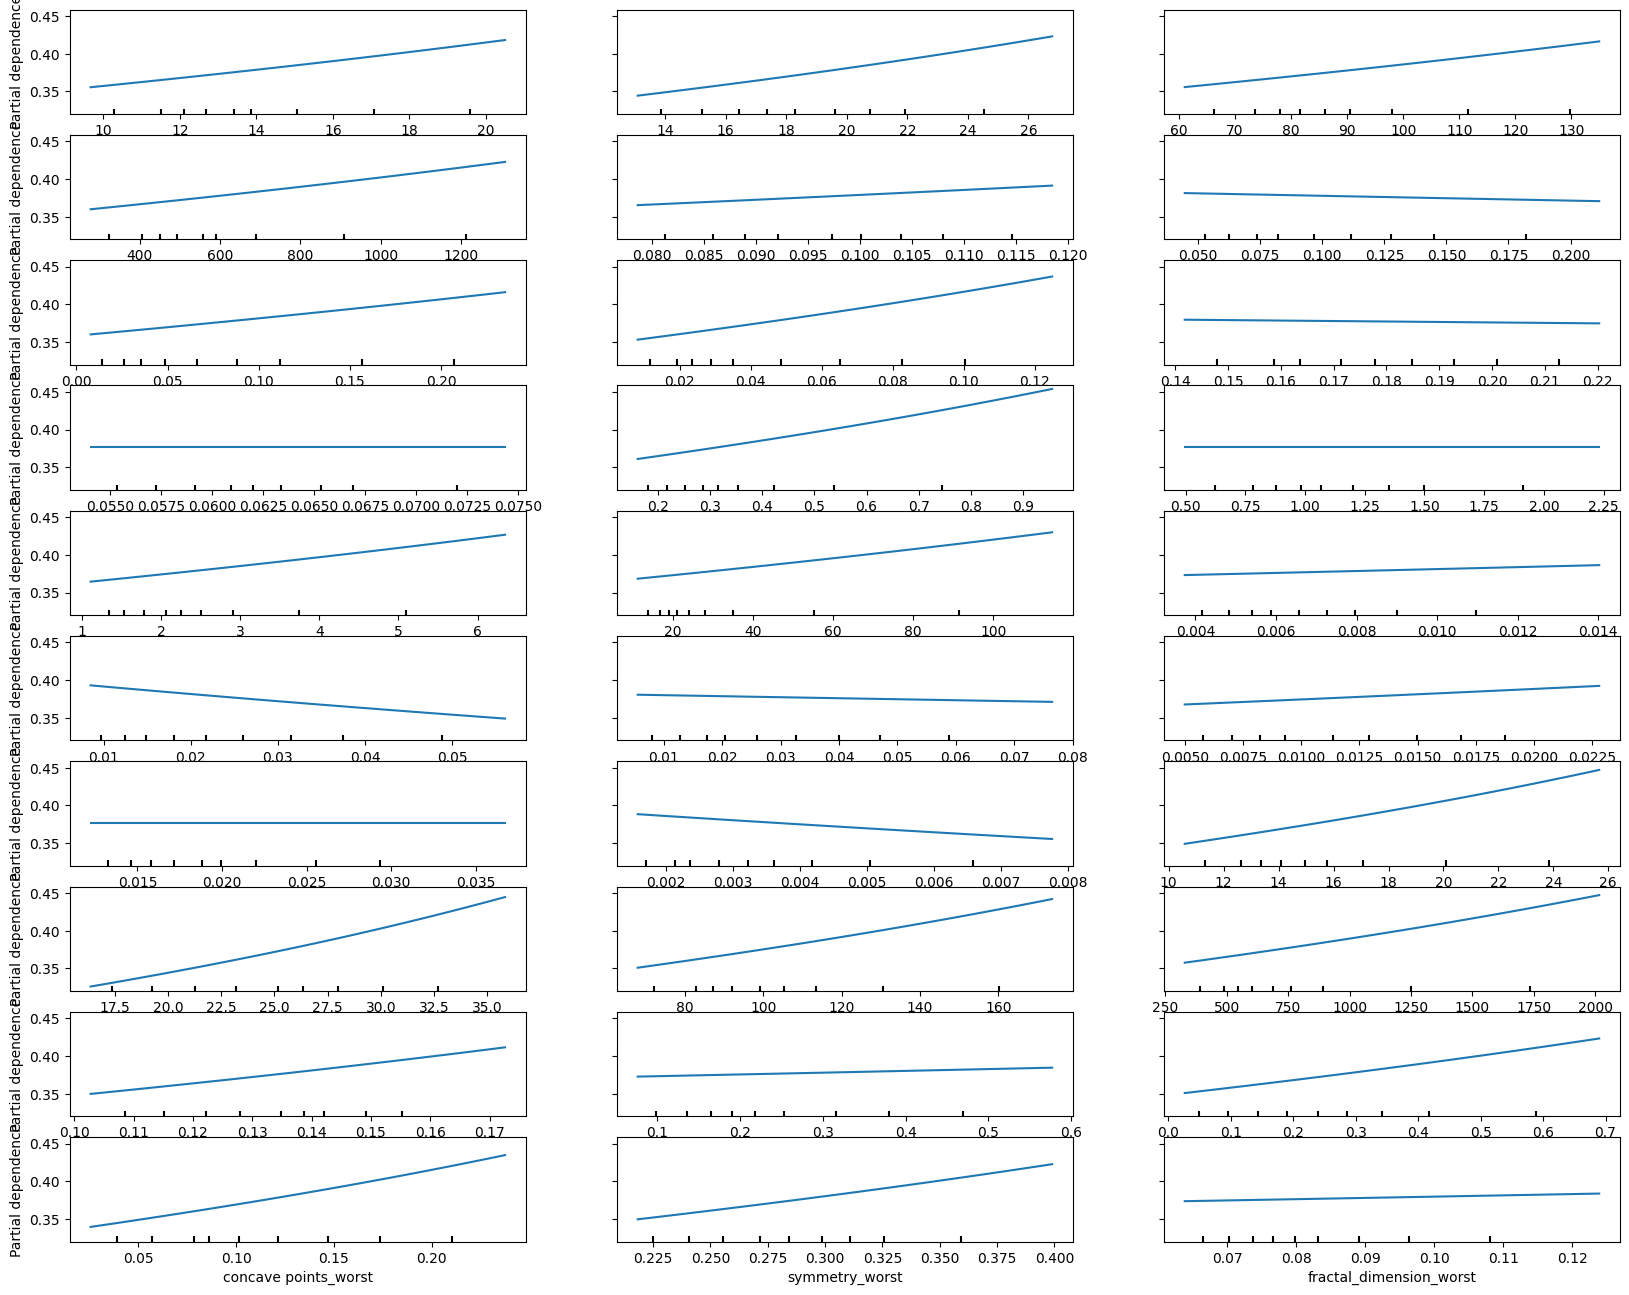

In [94]:
features = X.columns

fig, ax = plt.subplots(figsize=(20,16))
display = PartialDependenceDisplay.from_estimator(model, X_test, features, ax=ax)
plt.show()

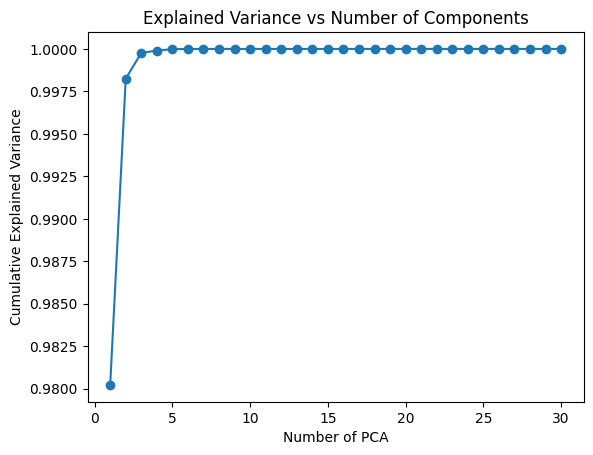

Optimal number of PCA components: 1


In [96]:
pca = PCA().fit(X_train)
explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1,len(explained_variance)+1), explained_variance, marker = 'o')
plt.xlabel('Number of PCA')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.show()

optimal_components = np.argmax(explained_variance >= 0.95) + 1

print(f"Optimal number of PCA components: {optimal_components}")

In [97]:
model_pca = PCA(n_components = 1)
x_PCA = model_pca.fit_transform(X_train)

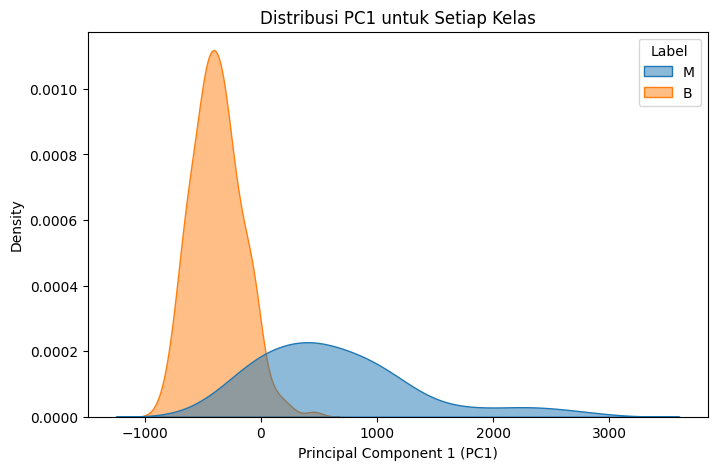

In [108]:
df_pca = pd.DataFrame({'PC1': x_PCA[:, 0], 'Label': y_train})

plt.figure(figsize=(8, 5))
sns.kdeplot(data=df_pca, x='PC1', hue='Label', fill=True, alpha=0.5)
plt.title('Distribusi PC1 untuk Setiap Kelas')
plt.xlabel('Principal Component 1 (PC1)')
plt.show()

C:\Users\Robyi\AppData\Local\Temp\ipykernel_2616\3880067628.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=y_train, y=x_PCA[:, 0], palette='viridis')


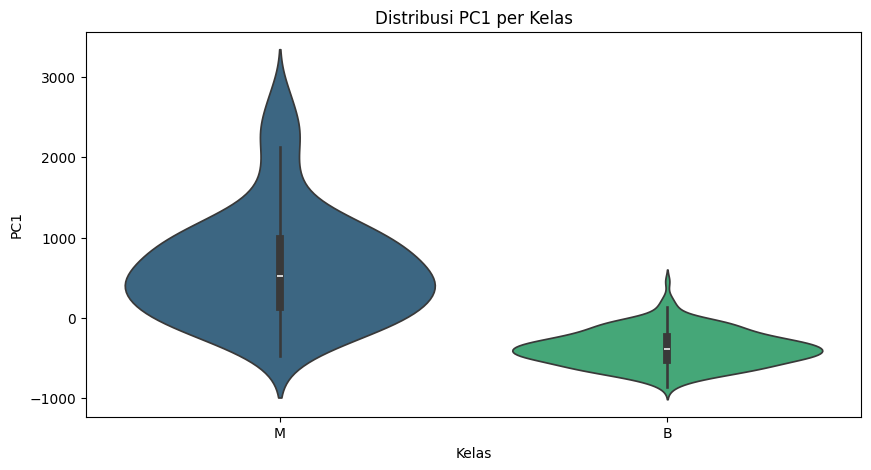

In [110]:
plt.figure(figsize=(10, 5))
sns.violinplot(x=y_train, y=x_PCA[:, 0], palette='viridis')
plt.title('Distribusi PC1 per Kelas')
plt.xlabel('Kelas')
plt.ylabel('PC1')
plt.show()

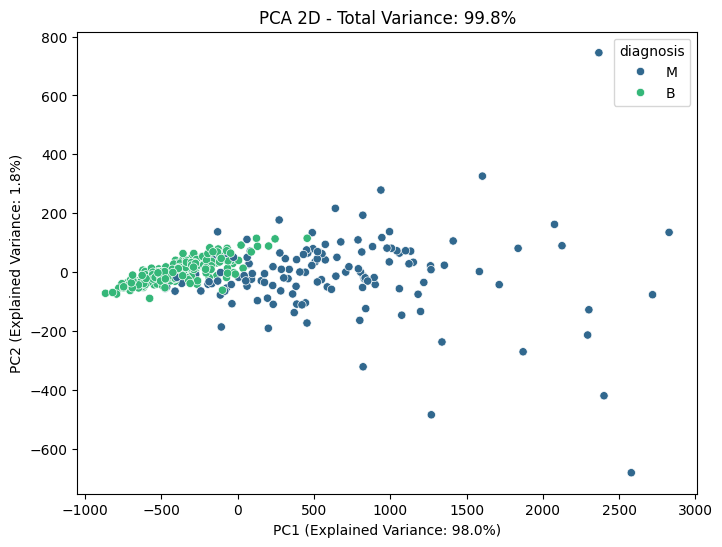

In [109]:
pca_2d = PCA(n_components=2)
x_pca_2d = pca_2d.fit_transform(X_train)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_pca_2d[:, 0], y=x_pca_2d[:, 1], hue=y_train, palette='viridis')
plt.xlabel('PC1 (Explained Variance: {:.1f}%)'.format(pca_2d.explained_variance_ratio_[0]*100))
plt.ylabel('PC2 (Explained Variance: {:.1f}%)'.format(pca_2d.explained_variance_ratio_[1]*100))
plt.title('PCA 2D - Total Variance: {:.1f}%'.format(pca_2d.explained_variance_ratio_.sum()*100))
plt.show()

In [115]:
loading = pd.DataFrame(
    model_pca.components_,
    columns = X_train.columns,
    index = [f'PCA{i+1}' for i in range(model_pca.n_components_)])

loading.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
PCA1     0.005154      0.002105        0.035423   0.521037         0.000005   

      compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
PCA1           0.00004        0.000079             0.000049       0.000006   

      fractal_dimension_mean  ...  radius_worst  texture_worst  \
PCA1               -0.000003  ...      0.007195       0.003108   

      perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
PCA1         0.049539    0.849677          0.000008           0.000095   

      concavity_worst  concave points_worst  symmetry_worst  \
PCA1         0.000156              0.000074        0.000018   

      fractal_dimension_worst  
PCA1             4.180930e-07  

[1 rows x 30 columns]

In [116]:
loading = pd.DataFrame(
    pca_2d.components_,
    columns = X_train.columns,
    index = [f'PCA{i+1}' for i in range(pca_2d.n_components_)])

loading.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
PCA1     0.005154      0.002105        0.035423   0.521037         0.000005   
PCA2     0.008686     -0.004209        0.058919   0.847019        -0.000016   

      compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
PCA1          0.000040        0.000079             0.000049       0.000006   
PCA2          0.000002        0.000080             0.000043      -0.000032   

      fractal_dimension_mean  ...  radius_worst  texture_worst  \
PCA1               -0.000003  ...      0.007195       0.003108   
PCA2               -0.000016  ...     -0.001104      -0.015782   

      perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
PCA1         0.049539    0.849677          0.000008           0.000095   
PCA2        -0.004654   -0.525008         -0.000080          -0.000228   

      concavity_worst  concave points_worst  symmetry_worst  \
PCA1         0.000156              0.000074        0.000018   
PCA2        -0.000187             -0.000044       -0.000169   

      fractal_dimension_worst  
PCA1             4.180930e-07  
PCA2            -5.513523e-05  

[2 rows x 30 columns]

In [132]:
new_data = pd.read_csv(r"C:\Users\Robyi\Documents\Data Science Dataset\cancerbaru.csv")

X_new = new_data.drop(["id","diagnosis","Unnamed: 32"], axis=1)

predictions = model.predict(X_new)

print(X_new)
print(predictions)

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           